<h2>Part I: Introduction and Preparation</h2><br>

The dataset represents the  download behavior and other information of the consumer app. Demographic and psychometric information for each consumer were collected from the survey for analysis to help  marketing departments to segment users. Our roadmap in this task is the following: 
a) Reduce the number of variables: The original dataset have over 40 columns, which make difficult to interpret any conclusion. We focus in a psychometric  view to do this.
b) Make a segmentation based in the KNN-mean technique, with this we can associate observations in clusters which will be our target customer for a specifics strategies.
c) Use demographics data to be even more precise in our recommendation.
d) Make recommendations to the marketing team based in the cluster we have found.
<br><br><br>
<br><h4>a) Imports and Loading the Dataset</h4>
1. Import the following packages:

2. Load the <strong> Mobile_App_Survey_Data.xlsx </strong> dataset



In [1]:
########################################
# importing packages
########################################
import numpy             as np                   # mathematical essentials
import pandas            as pd                   # data science essentials
import matplotlib.pyplot as plt                  # fundamental data visualization
import seaborn           as sns                  # enhanced visualization
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans # k-means clustering

########################################
# loading data and setting display options
########################################
# loading data
survey_df = pd.read_excel('./Mobile_App_Survey_Data.xlsx')


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)
survey_df.head()

,caseID,q1,q2r1,q2r2,q2r3,q2r4,q2r5,q2r6,q2r7,q2r8,q2r9,q2r10,q4r1,q4r2,q4r3,q4r4,q4r5,q4r6,q4r7,q4r8,q4r9,q4r10,q4r11,q11,q12,q13r1,q13r2,q13r3,q13r4,q13r5,q13r6,q13r7,q13r8,q13r9,q13r10,q13r11,q13r12,q24r1,q24r2,q24r3,q24r4,q24r5,q24r6,q24r7,q24r8,q24r9,q24r10,q24r11,q24r12,q25r1,q25r2,q25r3,q25r4,q25r5,q25r6,q25r7,q25r8,q25r9,q25r10,q25r11,q25r12,q26r18,q26r3,q26r4,q26r5,q26r6,q26r7,q26r8,q26r9,q26r10,q26r11,q26r12,q26r13,q26r14,q26r15,q26r16,q26r17,q48,q49,q50r1,q50r2,q50r3,q50r4,q50r5,q54,q55,q56,q57
0,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,4,4,4,4,4,4,4,4,4,4,4,5,3,3,5,5,4,5,3,4,3,3,3,5,5,4,5,4,5,4,5,3,3,4,5,5,2,3,3,3,5,5,3,4,6,4,4,4,4,4,4,3,4,1,0,0,0,0,2,2,5,1
1,2,5,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,3,3,1,2,2,1,2,2,2,2,2,2,2,2,1,1,2,1,1,1,1,1,1,1,2,2,1,2,1,2,2,1,2,1,2,2,2,1,2,2,2,2,1,1,3,2,2,1,1,2,2,2,2,2,5,1,0,1,1,0,0,3,2,10,2
2,3,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,5,1,3,4,2,4,2,4,4,2,4,4,3,5,3,2,3,3,3,2,3,3,4,5,3,3,5,4,2,5,5,4,4,4,3,3,4,6,1,4,3,5,6,5,5,5,3,5,5,4,5,3,3,4,4,0,0,0,1,0,2,2,6,1
3,4,7,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,2,2,1,4,4,4,4,2,4,4,2,4,4,4,2,1,1,2,1,1,1,2,2,2,2,3,2,2,2,2,1,2,1,3,2,2,2,1,3,1,1,2,2,4,3,2,2,2,3,2,3,2,2,2,2,1,0,1,1,0,0,1,2,5,1
4,6,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,3,1,2,3,3,3,2,2,2,4,1,2,2,3,3,3,2,2,3,3,2,3,3,2,2,3,2,3,3,3,3,3,2,2,2,1,1,2,2,1,4,3,3,3,2,3,3,3,3,3,2,3,1,5,2,1,0,0,0,0,3,2,4,2


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>First survey of the dataset</h3><br>

<h4>a)Total number of features present in the dataset

In [2]:
survey_df.columns

Index(['caseID', 'q1', 'q2r1', 'q2r2', 'q2r3', 'q2r4', 'q2r5', 'q2r6', 'q2r7', 'q2r8', 'q2r9', 'q2r10', 'q4r1', 'q4r2', 'q4r3', 'q4r4', 'q4r5', 'q4r6', 'q4r7', 'q4r8', 'q4r9', 'q4r10', 'q4r11', 'q11', 'q12', 'q13r1', 'q13r2', 'q13r3', 'q13r4', 'q13r5', 'q13r6', 'q13r7', 'q13r8', 'q13r9', 'q13r10', 'q13r11', 'q13r12', 'q24r1', 'q24r2', 'q24r3', 'q24r4', 'q24r5', 'q24r6', 'q24r7', 'q24r8', 'q24r9', 'q24r10', 'q24r11', 'q24r12', 'q25r1', 'q25r2', 'q25r3', 'q25r4', 'q25r5', 'q25r6', 'q25r7', 'q25r8', 'q25r9', 'q25r10', 'q25r11', 'q25r12', 'q26r18', 'q26r3', 'q26r4', 'q26r5', 'q26r6', 'q26r7', 'q26r8', 'q26r9', 'q26r10', 'q26r11', 'q26r12', 'q26r13', 'q26r14', 'q26r15', 'q26r16', 'q26r17', 'q48', 'q49', 'q50r1', 'q50r2', 'q50r3', 'q50r4', 'q50r5', 'q54', 'q55', 'q56', 'q57'], dtype='object')

<h4>b) From the psychometric question, two lists and one list of other behaviors were created. q24 and q25  are similar and uncorrelated, so they are separate. On the other hand, I have another list of other actions.</h4>



In [3]:
# divided the psychometric features and other behaviors features
list_1  = ['q24r1', 'q24r2', 'q24r3', 'q24r4', 'q24r5', 'q24r6', 'q24r7', 'q24r8', 'q24r9', 'q24r10', 'q24r11', 'q24r12', 'q26r18', 'q26r3', 'q26r4', 'q26r5', 'q26r6', 'q26r7', 'q26r8', 'q26r9', 'q26r10', 'q26r11', 'q26r12', 'q26r13', 'q26r14', 'q26r15', 'q26r16', 'q26r17'  ]
list_2  = ['q25r1', 'q25r2', 'q25r3', 'q25r4', 'q25r5', 'q25r6', 'q25r7', 'q25r8', 'q25r9', 'q25r10', 'q25r11', 'q25r12']
list_3  = ['q11', 'q12', 'q13r1', 'q13r2', 'q13r3', 'q13r4', 'q13r5', 'q13r6', 'q13r7', 'q13r8', 'q13r9', 'q13r10', 'q13r11', 'q13r12']
psycometric_df = survey_df.loc[:, list_1]
psycometric2_df = survey_df.loc[:, list_2]
other_behaviours_df = survey_df.loc[:, list_3]

<h4>c) DESCRIBE every quantitative column the use of descriptive information. Descriptive information assist us to higher apprehend our dataset</h4>

In [4]:
# get descriptive information 
psycometric_df.describe()

,q24r1,q24r2,q24r3,q24r4,q24r5,q24r6,q24r7,q24r8,q24r9,q24r10,q24r11,q24r12,q26r18,q26r3,q26r4,q26r5,q26r6,q26r7,q26r8,q26r9,q26r10,q26r11,q26r12,q26r13,q26r14,q26r15,q26r16,q26r17
count,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000,1552.000000
mean,3.155928,1.703608,2.219072,3.236469,2.871134,1.808634,2.070876,1.989691,3.811856,2.050902,2.441366,1.980026,3.016753,2.150129,3.000000,3.000644,3.036727,3.249356,3.279639,2.588918,2.800258,3.859536,3.102448,3.330541,3.322809,2.416881,3.121778,2.548325
std,1.539982,0.958070,1.404955,1.568183,1.445825,1.047598,1.102194,1.039465,1.613743,1.091843,1.278868,1.030915,1.506822,1.157495,1.407816,1.325493,1.417607,1.469768,1.464965,1.355013,1.363634,1.756150,1.420743,1.531410,1.417691,1.186991,1.435478,1.278795
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
50%,3.000000,1.000000,2.000000,3.000000,3.000000,1.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000
75%,4.000000,2.000000,3.000000,4.000000,4.000000,2.000000,3.000000,3.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,6.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
max,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>User-Defined Functions</strong><br>
<h4>d)Run below the code to load the user-defined functions. we can plot pca object from this method</h4> 

In [5]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    """
    Visualizes a scree plot from a pca object.
    
    PARAMETERS
    ----------
    pca_object | A fitted pca object
    export     | Set to True if you would like to save the scree plot to the
               | current working directory (default: False)
    """
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    #if export == True:
    
        # exporting the plot
        #plt.savefig('./__analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()


########################################
# unsupervised_scaler
########################################
def unsupervised_scaler_row(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler()


    # FITTING the scaler with the data
    scaler.fit(df.transpose())


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df.transpose())

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    #new_df.columns = df.columns
    
    return new_df.transpose()
def unsupervised_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler()


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>e) Write a loop to logarithmically transform the non-demographic features of the dataset.</h4>


In [6]:
# looping to logarithmically transform non-demographic features
for col in psycometric_df:
    if psycometric_df[col].skew() >= 1:
        psycometric_df['log_' + col ] = np.log(psycometric_df[col] + 0.99)

for col in psycometric2_df:
    if psycometric2_df[col].skew() >= 1:
        psycometric2_df['log_' + col ] = np.log(psycometric2_df[col] + 0.99)    

# checking results
psycometric_df.columns

Index(['q24r1', 'q24r2', 'q24r3', 'q24r4', 'q24r5', 'q24r6', 'q24r7', 'q24r8', 'q24r9', 'q24r10', 'q24r11', 'q24r12', 'q26r18', 'q26r3', 'q26r4', 'q26r5', 'q26r6', 'q26r7', 'q26r8', 'q26r9', 'q26r10', 'q26r11', 'q26r12', 'q26r13', 'q26r14', 'q26r15', 'q26r16', 'q26r17', 'log_q24r2', 'log_q24r3', 'log_q24r6', 'log_q24r7', 'log_q24r8', 'log_q24r10', 'log_q24r12', 'log_q26r3'], dtype='object')

In [7]:
# checking results
psycometric2_df.columns

Index(['q25r1', 'q25r2', 'q25r3', 'q25r4', 'q25r5', 'q25r6', 'q25r7', 'q25r8', 'q25r9', 'q25r10', 'q25r11', 'q25r12', 'log_q25r7'], dtype='object')

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

Explanatory variables are scaled before developing a principal component analysis algorithm.<br><br><br>
* Drop demographic data and the non-logarithmic features. Store the result as psychometric feature
* Instantiate a StandardScaler( ) object
* Fit the scaler object to psychometric feature
* Transform psychometric feature using the scaler object

In [8]:
drop_0 = ['q24r1', 'q24r2', 'q24r3', 'q24r4', 'q24r5', 'q24r6', 'q24r7', 'q24r8', 'q24r9', 'q24r10', 'q24r11', 
            'q24r12', 'q25r1', 'q25r2', 'q25r3', 'q25r4', 'q25r5', 'q25r6', 'q25r7', 'q25r8', 'q25r9', 'q25r10', 
            'q25r11', 'q25r12', 'q26r18', 'q26r3', 'q26r4', 'q26r5', 'q26r6', 'q26r7', 'q26r8', 'q26r9', 'q26r10', 
            'q26r11', 'q26r12', 'q26r13', 'q26r14', 'q26r15', 'q26r16', 'q26r17']
drop_1 = ['q24r2', 'q24r3', 'q24r6', 'q24r7', 'q24r8', 'q24r10', 'q24r12'  , 'q26r3']

psycometric_behavior_df = psycometric_df.drop(drop_1, axis = 1)
# applying the unsupervised_scaler function for rows
pyscometric_behavior_scaled_vp = unsupervised_scaler_row(df = psycometric_behavior_df)
# applying the unsupervised_scaler function for columns
pyscometric_behavior_scaled = unsupervised_scaler(df = pyscometric_behavior_scaled_vp)

# checking pre- and post-scaling variance
print(np.var(psycometric_behavior_df), '\n\n')
print(np.var(pyscometric_behavior_scaled))

q24r1         2.370016
q24r4         2.457613
q24r5         2.089064
q24r9         2.602488
q24r11        1.634449
q26r18        2.269049
q26r4         1.980670
q26r5         1.755799
q26r6         2.008316
q26r7         2.158827
q26r8         2.144740
q26r9         1.834877
q26r10        1.858299
q26r11        3.082074
q26r12        2.017210
q26r13        2.343706
q26r14        2.008552
q26r15        1.408040
q26r16        2.059268
q26r17        1.634263
log_q24r2     0.095709
log_q24r3     0.156320
log_q24r6     0.108981
log_q24r7     0.112752
log_q24r8     0.105194
log_q24r10    0.113489
log_q24r12    0.104412
log_q26r3     0.120790
dtype: float64 


0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
dtype: float64


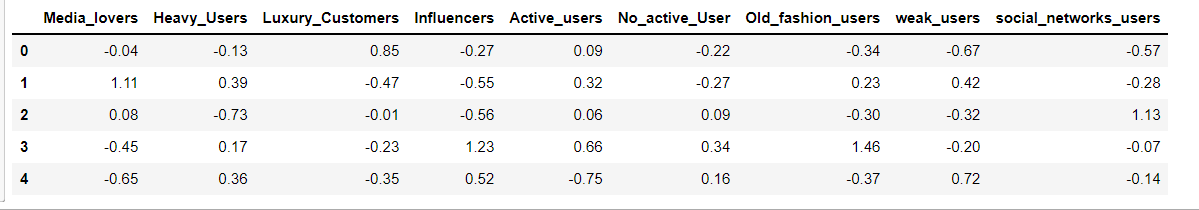<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part I: Principal Component Analysis</h2><br>
We used scaled data to instantiate, fit, and transform a PCA model.

In [9]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = 3,
            random_state = 219)


# FITTING and TRANSFORMING the scaled data
pyscometric_pca = pca.fit_transform(pyscometric_behavior_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", pyscometric_behavior_scaled.shape)
print("PCA shape     :", pyscometric_pca.shape)

Original shape: (1552, 28)
PCA shape     : (1552, 3)


Above we put components 5 but graph showing constant after 3 componenets so we changed components number 3.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part II: Evaluating PCA Algorithms</h2><br>
Printing its component number as well as its explained variance ratio by looping each principal component.

In [10]:
# component number counter
component_number = 0
accum = 0
# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    accum = variance.round(3) + accum
    
    print(f"PC {component_number}: {variance.round(3)}")

print(f"total : {accum}" )

PC 1: 0.212
PC 2: 0.067
PC 3: 0.06
total : 0.339


In [11]:
drop_2 = ['q25r7']

psycometric2_behavior_df = psycometric2_df.drop(drop_2, axis = 1)
# applying the unsupervised_scaler function for rows
pyscometric2_behavior_scaled_vp = unsupervised_scaler_row(df = psycometric2_behavior_df)
# applying the unsupervised_scaler function for columns
pyscometric2_behavior_scaled = unsupervised_scaler(df = pyscometric2_behavior_scaled_vp)
#pyscometric_scaled = unsupervised_scaler(df = psycometric_behavior)

# checking pre- and post-scaling variance
print(np.var(psycometric2_behavior_df), '\n\n')
print(np.var(pyscometric2_behavior_scaled))

q25r1        1.251600
q25r2        1.494538
q25r3        1.175736
q25r4        1.214625
q25r5        1.364530
q25r6        2.392788
q25r8        1.536148
q25r9        1.247248
q25r10       1.296109
q25r11       1.364405
q25r12       1.770293
log_q25r7    0.104126
dtype: float64 


0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
dtype: float64


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2><strong>Scree Plots</strong><br></h2>
We are looking for an "elbow" in the plot, where the line connecting each principal component becomes less steep.<br><br>
<h3>a) Call the scree_plot function on the PCA object.</h3>

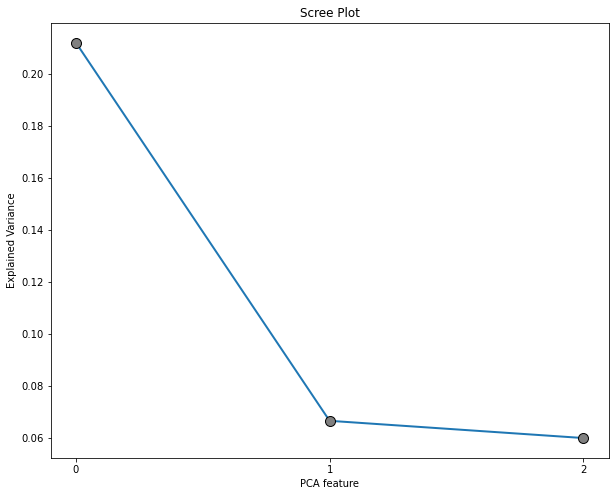

In [12]:
scree_plot (pca_object  = pca,
            export = False)

In [13]:
# INSTANTIATING a PCA object with no limit to principal components
pca_2 = PCA(n_components = 3,
            random_state = 219)


# FITTING and TRANSFORMING the scaled data
pyscometric_pca_2 = pca_2.fit_transform(pyscometric2_behavior_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", pyscometric2_behavior_scaled.shape)
print("PCA shape     :", pyscometric_pca_2.shape)

Original shape: (1552, 12)
PCA shape     : (1552, 3)


<h4>a)Above we put components 5 but graph showing constant after 3 componenets so we changed components number 3.</h4>

In [14]:
# component number counter
component_number = 0
accum = 0
# looping over each principal component
for variance in pca_2.explained_variance_ratio_:
    component_number += 1
    accum = variance.round(3) + accum
    
    print(f"PC {component_number}: {variance.round(3)}")

print(f"total : {accum}" )

PC 1: 0.177
PC 2: 0.111
PC 3: 0.103
total : 0.39099999999999996


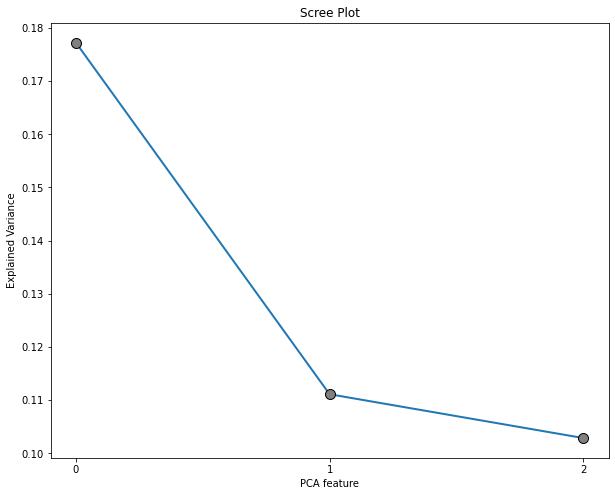

In [15]:
scree_plot (pca_object  = pca_2,
            export = False)

In [16]:
# applying the unsupervised_scaler function for rows
other_behaviours_scaled_vp = unsupervised_scaler_row(df = other_behaviours_df)
# applying the unsupervised_scaler function for columns
other_behavior_scaled = unsupervised_scaler(df = other_behaviours_scaled_vp)
#pyscometric_scaled = unsupervised_scaler(df = psycometric_behavior)

# checking pre- and post-scaling variance
print(np.var(other_behaviours_df), '\n\n')
print(np.var(other_behavior_scaled))

q11       1.041629
q12       1.801433
q13r1     0.768333
q13r2     1.538911
q13r3     1.019038
q13r4     1.393160
q13r5     1.150461
q13r6     0.644934
q13r7     0.915226
q13r8     0.983015
q13r9     1.360026
q13r10    1.393093
q13r11    1.140896
q13r12    1.584795
dtype: float64 


0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
dtype: float64


In [17]:
# INSTANTIATING a PCA object with no limit to principal components
pca_3 = PCA(n_components = 3,
            random_state = 219)


# FITTING and TRANSFORMING the scaled data
other_behavior_pca_3 = pca_3.fit_transform(other_behavior_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", other_behavior_scaled.shape)
print("PCA shape     :", other_behavior_pca_3.shape)

Original shape: (1552, 14)
PCA shape     : (1552, 3)


<h4>b)Above we put components 5 but graph showing constant after 3 componenets so we changed components number 3.</h4>

In [18]:
# component number counter
component_number = 0
accum = 0
# looping over each principal component
for variance in pca_3.explained_variance_ratio_:
    component_number += 1
    accum = variance.round(3) + accum
    
    print(f"PC {component_number}: {variance.round(3)}")

print(f"total : {accum}" )

PC 1: 0.143
PC 2: 0.115
PC 3: 0.093
total : 0.351


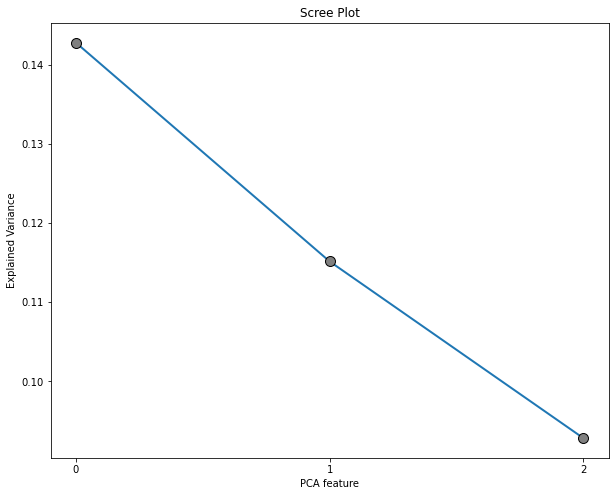

In [19]:
scree_plot (pca_object  = pca_3,
            export = False)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>c) Analyze the PC factor loadings.</h4>
Analysing the factor loadings and developing a persona for each principal component. 

In [20]:
# transposing pca components
factor_loadings_df = pd.DataFrame(np.transpose(pca.components_.round(decimals = 2)))


# naming rows as original features
factor_loadings_df = factor_loadings_df.set_index(pyscometric_behavior_scaled.columns)


# checking the result
print(factor_loadings_df)


# saving to Excel
#factor_loadings_df.to_excel('mobile_survey_pyscometric_1.xlsx')

       0     1     2
0   0.06 -0.34 -0.18
1   0.11 -0.50 -0.11
2  -0.02  0.01 -0.27
3   0.16 -0.48 -0.05
4  -0.01  0.16 -0.34
5  -0.16  0.02  0.42
6  -0.14 -0.02  0.24
7  -0.08 -0.06 -0.10
8  -0.08  0.16  0.01
9  -0.13 -0.00  0.40
10 -0.11  0.26 -0.22
11 -0.10  0.13 -0.04
12 -0.15  0.26 -0.27
13  0.06  0.06  0.02
14 -0.10  0.20 -0.13
15 -0.03  0.01  0.10
16 -0.11  0.13  0.30
17 -0.12  0.00  0.16
18 -0.09  0.02  0.17
19 -0.14  0.06 -0.15
20  0.33  0.09  0.06
21  0.29  0.08  0.03
22  0.31  0.07  0.09
23  0.32  0.12  0.02
24  0.32  0.17  0.03
25  0.32  0.18  0.01
26  0.32  0.17  0.04
27  0.28  0.01  0.15


In [21]:
# transposing pca components
factor_loadings_df_2 = pd.DataFrame(np.transpose(pca_2.components_.round(decimals = 2)))


# naming rows as original features
factor_loadings_df_2 = factor_loadings_df_2.set_index(pyscometric2_behavior_scaled.columns)


# checking the result
print(factor_loadings_df_2)


# saving to Excel
#factor_loadings_df_2.to_excel('mobile_survey_pyscometric_2.xlsx')

       0     1     2
0   0.27 -0.25 -0.16
1   0.18 -0.32  0.29
2   0.19 -0.02  0.40
3   0.30 -0.02 -0.36
4   0.18 -0.37  0.02
5  -0.56 -0.12  0.12
6   0.11 -0.31 -0.36
7   0.19  0.22  0.54
8   0.16  0.53  0.07
9   0.16  0.48 -0.35
10 -0.24  0.17 -0.16
11 -0.52 -0.02 -0.06


In [22]:
# transposing pca components
factor_loadings_df_3 = pd.DataFrame(np.transpose(pca_3.components_.round(decimals = 2)))


# naming rows as original features
factor_loadings_df_3 = factor_loadings_df_3.set_index(other_behavior_scaled.columns)


# checking the result
print(factor_loadings_df_3)


# saving to Excel
#factor_loadings_df_3.to_excel('mobile_survey_other_behavior.xlsx')

       0     1     2
0   0.27 -0.42  0.15
1   0.39 -0.16 -0.09
2   0.31 -0.08 -0.21
3  -0.16  0.05 -0.59
4  -0.38 -0.29 -0.12
5   0.07  0.37  0.22
6  -0.26  0.12  0.30
7   0.32 -0.10  0.20
8  -0.39 -0.21  0.15
9  -0.34  0.15  0.20
10 -0.23 -0.37  0.18
11  0.02  0.44 -0.04
12 -0.14  0.14 -0.48
13  0.09  0.36  0.23


In [23]:
##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
factor_loadings = pd.DataFrame(np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(pyscometric_behavior_scaled.columns)

# transposing pca components (pc = 3)
factor_loadings_2 = pd.DataFrame(np.transpose(pca_2.components_))

# naming rows as original features
factor_loadings_2 = factor_loadings_2.set_index(pyscometric2_behavior_scaled.columns)

# transposing pca components (pc = 3)
factor_loadings_3 = pd.DataFrame(np.transpose(pca_3.components_))

# naming rows as original features
factor_loadings_3 = factor_loadings_3.set_index(other_behavior_scaled.columns)

# checking the results
print(f"""

3 Components Factor Loadings Q24 and Q26
------------------------------
{factor_loadings.round(2)}
3 Components Factor Loadings Q25
------------------------------
{factor_loadings_2.round(2)}

3 Components Factor Loadings other behavior
------------------------------
{factor_loadings_2.round(2)}
""")



3 Components Factor Loadings Q24 and Q26
------------------------------
       0     1     2
0   0.06 -0.34 -0.18
1   0.11 -0.50 -0.11
2  -0.02  0.01 -0.27
3   0.16 -0.48 -0.05
4  -0.01  0.16 -0.34
5  -0.16  0.02  0.42
6  -0.14 -0.02  0.24
7  -0.08 -0.06 -0.10
8  -0.08  0.16  0.01
9  -0.13 -0.00  0.40
10 -0.11  0.26 -0.22
11 -0.10  0.13 -0.04
12 -0.15  0.26 -0.27
13  0.06  0.06  0.02
14 -0.10  0.20 -0.13
15 -0.03  0.01  0.10
16 -0.11  0.13  0.30
17 -0.12  0.00  0.16
18 -0.09  0.02  0.17
19 -0.14  0.06 -0.15
20  0.33  0.09  0.06
21  0.29  0.08  0.03
22  0.31  0.07  0.09
23  0.32  0.12  0.02
24  0.32  0.17  0.03
25  0.32  0.18  0.01
26  0.32  0.17  0.04
27  0.28  0.01  0.15
3 Components Factor Loadings Q25
------------------------------
       0     1     2
0   0.27 -0.25 -0.16
1   0.18 -0.32  0.29
2   0.19 -0.02  0.40
3   0.30 -0.02 -0.36
4   0.18 -0.37  0.02
5  -0.56 -0.12  0.12
6   0.11 -0.31 -0.36
7   0.19  0.22  0.54
8   0.16  0.53  0.07
9   0.16  0.48 -0.35
10 -0.24  0.17 -0.16
1

In [24]:
# naming each principal component
factor_loadings.columns = ['Media_lovers',   
                           'Heavy_Users',       
                           'Luxury_Customers'] 


columns_1 = factor_loadings.columns

factor_loadings_2.columns = ['Influencers', 
                           'Active_users',       
                           'No_active_User']
columns_2 = factor_loadings_2.columns

factor_loadings_3.columns = ['Old fashion users', 
                           'weak users',       
                           'social networks users']
columns_3 = factor_loadings_3.columns

# checking the result
factor_loadings





,Media_lovers,Heavy_Users,Luxury_Customers
0,0.057022,-0.344900,-0.181770
1,0.110821,-0.501583,-0.106622
2,-0.015923,0.008704,-0.272427
3,0.161102,-0.481218,-0.045373
4,-0.012858,0.159344,-0.344717
5,-0.155014,0.018282,0.422380
6,-0.136391,-0.024048,0.238488
7,-0.078089,-0.060280,-0.096034
8,-0.076467,0.156114,0.014037
9,-0.133720,-0.003286,0.398046


In [25]:
factor_loadings_2

,Influencers,Active_users,No_active_User
0,0.270685,-0.252398,-0.163058
1,0.183435,-0.317937,0.285973
2,0.193324,-0.024783,0.401389
3,0.295673,-0.021165,-0.363342
4,0.176335,-0.365664,0.022072
5,-0.557242,-0.120054,0.124197
6,0.107654,-0.310515,-0.362587
7,0.186378,0.223339,0.541171
8,0.158630,0.528958,0.070142
9,0.155017,0.480358,-0.353392


In [26]:
# analyzing factor strengths per customer
factor_loadings = pca.transform(pyscometric_behavior_scaled)


# converting to a DataFrame
factor_loadings_df = pd.DataFrame(factor_loadings)


# renaming columns
factor_loadings_df.columns = columns_1


# checking the results
factor_loadings_df

,Media_lovers,Heavy_Users,Luxury_Customers
0,-2.577897,-0.991030,-0.462820
1,-0.580087,2.646040,0.028748
2,-3.184489,1.022232,0.179811
3,-1.333844,1.456721,1.294938
4,-0.012110,0.533566,-0.590455
...,...,...,...
1547,5.069164,1.532728,0.155934
1548,3.685491,-2.045425,-0.919779
1549,-1.230038,1.004022,0.637616
1550,1.017629,-1.933279,0.659623


In [27]:
# analyzing factor strengths per customer
factor_loadings_2 = pca_2.transform(pyscometric2_behavior_scaled)


# converting to a DataFrame
factor_loadings_df_2 = pd.DataFrame(factor_loadings_2)


# renaming columns
factor_loadings_df_2.columns = columns_2


# checking the results
factor_loadings_df_2

,Influencers,Active_users,No_active_User
0,1.483454,-1.604242,-1.381465
1,2.088192,1.744365,0.561837
2,0.343115,-1.432854,2.278377
3,2.114242,0.237202,-0.304828
4,1.518307,-2.105095,0.924176
...,...,...,...
1547,-1.251751,-0.946728,-0.859888
1548,-0.958995,1.402252,-1.804087
1549,0.033415,2.297941,-0.603357
1550,-1.674955,1.793000,-1.167709


In [28]:
# analyzing factor strengths per customer
factor_loadings_3 = pca_3.transform(other_behavior_scaled)


# converting to a DataFrame
factor_loadings_df_3 = pd.DataFrame(factor_loadings_3)


# renaming columns
factor_loadings_df_3.columns = columns_3


# checking the results
factor_loadings_df_3

,Old fashion users,weak users,social networks users
0,-1.601566,1.991212,0.630994
1,1.767852,-1.210303,0.103092
2,-1.069416,1.456911,-0.506842
3,-1.980654,2.843333,-0.179388
4,-0.003134,-1.222699,1.350419
...,...,...,...
1547,-0.118193,0.146155,-1.413230
1548,-1.733358,-0.983644,0.058675
1549,2.728380,-1.028864,-0.681048
1550,-1.582713,-1.364496,-1.945695


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part IV: Agglomerative Clustering</h2><br>

Developing a dendrogram to understand how many clusters to build using k-Means

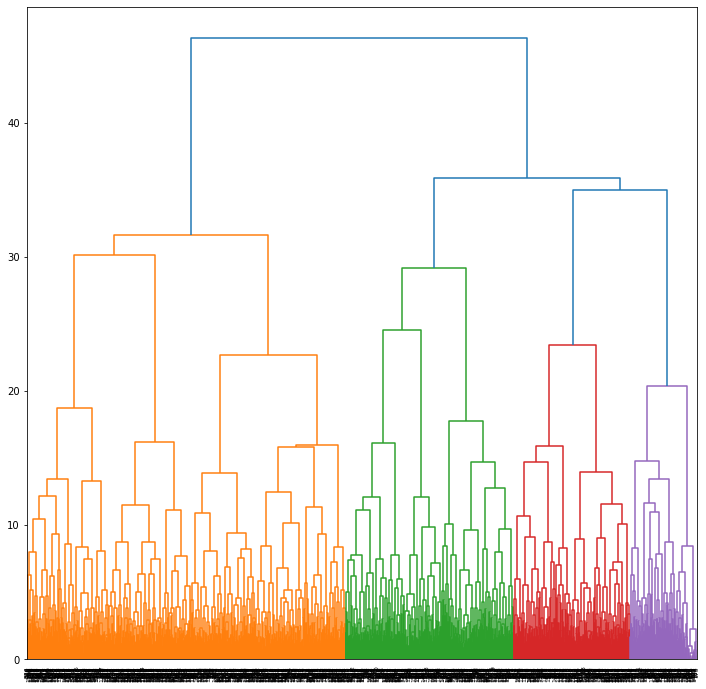

In [29]:
from  scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from  sklearn.cluster         import  KMeans # k-means clustering

factors_combined = pd.concat([factor_loadings_df,
                          factor_loadings_df_2,
                          factor_loadings_df_3
                             ],
                          axis = 1)

# applying the unsupervised_scaler function
pca_scaled = unsupervised_scaler(factors_combined)


# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# rendering the plot
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>a) Developing a k-Means model with five clusters.</h4>

In [30]:
# INSTANTIATING a k-Means object with five clusters
customers_k_pca = KMeans(n_clusters   = 5,
                        random_state = 219)


# fitting the object to the data
customers_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

0    372
4    371
2    319
1    290
3    200
Name: Cluster, dtype: int64


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>b)Displaying the centroids (mean values) for each cluster.</h4>

In [31]:
# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Media_lovers', 
                            'Heavy_Users' ,
                            'Luxury_Customers',
                            'Influencers',
                            'Active_users',
                            'No_active_User',
                            'Old_fashion_users',
                            'weak_users',
                            'social_networks_users']


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Media_lovers,Heavy_Users,Luxury_Customers,Influencers,Active_users,No_active_User,Old_fashion_users,weak_users,social_networks_users
0,-0.04,-0.13,0.85,-0.27,0.09,-0.22,-0.34,-0.67,-0.57
1,1.11,0.39,-0.47,-0.55,0.32,-0.27,0.23,0.42,-0.28
2,0.08,-0.73,-0.01,-0.56,0.06,0.09,-0.30,-0.32,1.13
3,-0.45,0.17,-0.23,1.23,0.66,0.34,1.46,-0.20,-0.07
4,-0.65,0.36,-0.35,0.52,-0.75,0.16,-0.37,0.72,-0.14


<h3><span class="girk">All Cluster analysis and our Recommendation.</span></h3>

<span class="pirk">Cluster 1:</span>
This group of customers is characterized by their love for buying products with a good design, specially making luxury shops. Definitely they are not users with a small budget.

Recommendation: 
Offers fashions ads inside the apps, offer extra features, and be aggressive with the quality because they can pay for them.

<span class="pirk">Cluster 2:</span>
This group of customers are really interested in the media industry, which a great inclination for movies, songs and streaming apps, On the other hand they are not a trend because their tastes are niche.

Recommendation:
Try to introduce ads in the streaming apps, offering discounts in “payed apps”, definitely not be massive because this group have particular tastes.

<span class="pirk">Cluster 3:</span>
This group most of time only use the devices for social networks, being fanatics of Facebook. However, they are not in the mood for install more apps or buy extra features.

Recommendation:
Invest in social ads for this group, don’t try to include them in other media channels because they don’t spend time in other things.

<span class="pirk">Cluster 4:</span>
This group don’t use trending apps as social networks, or digital apps, but they influence to theirs groups. Definitely, this group reject the new media streaming wave.

Recommendation:
This group is classic we can try to get their information to call them or offer discount coupons in the stores, use traditional channels with them.

<span class="pirk">Cluster 5:</span> 
This group is not very active in their behavior don’t like to spend time or money in their devices. 

Recommendation:
Try to filter this group in any advertisement strategy, they don’t have neither the budget or the the desire to spend more money.

In [32]:
# concatinating cluster memberships with principal components
clst_pca_df = pd.concat([customers_kmeans_pca,
                          factors_combined],
                          axis = 1)


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([survey_df.loc[ : , ['caseID', 'q1', 'q2r1', 'q2r2', 'q2r3', 'q2r4', 'q2r5', 
                                                 'q2r6', 'q2r7', 'q2r8', 'q2r9', 'q2r10', 'q4r1', 'q4r2', 'q4r3', 
                                                 'q4r4', 'q4r5', 'q4r6', 'q4r7', 'q4r8', 'q4r9', 'q4r10', 'q4r11', 
                                                 'q48', 'q49', 'q50r1', 'q50r2', 'q50r3', 'q50r4', 'q50r5', 'q54', 'q55', 
                                                 'q56', 'q57']],
                                  clst_pca_df.round(decimals = 2)],
                                  axis = 1)




# renaming columns
final_pca_clust_df.columns = [
'CaseID',
'Age',
'Is_Iphone',
'Is_Ipod',
'Is_Android',
'Is_BlackBerry',
'Is_Nokia',
'Is_windows_Phone',
'Is_hp',
'Is_tablet',
'Is_other',
'Is_none',
'Is_app_music',
'Is_tv_check',
'Is_enter_app',
'Is_app_tv_show',
'Is_app_gam',
'Is_app_soc',
'Is_app_news',
'Is_app_shop',
'Is_app_spec_news',
'Is_app_other',
'Is_app_none',
'Education_level',
'Marital_status',
'No_children',
'Children_6',
'Children_6_12',
'Children_13_17',
'Children_over18',
'Race',
'Hispanic',
'Salary',
'Gender', 
'Cluster', 
'Media_lovers', 
'Heavy_Users' ,
'Luxury_Customers',
'Influencers',
'Active_users',
'No_active_User',
'Old_fashion_users',
'weak_users',
'social_networks_users'
]


# checking the results
final_pca_clust_df.head(n = 5)

,CaseID,Age,Is_Iphone,Is_Ipod,Is_Android,Is_BlackBerry,Is_Nokia,Is_windows_Phone,Is_hp,Is_tablet,Is_other,Is_none,Is_app_music,Is_tv_check,Is_enter_app,Is_app_tv_show,Is_app_gam,Is_app_soc,Is_app_news,Is_app_shop,Is_app_spec_news,Is_app_other,Is_app_none,Education_level,Marital_status,No_children,Children_6,Children_6_12,Children_13_17,Children_over18,Race,Hispanic,Salary,Gender,Cluster,Media_lovers,Heavy_Users,Luxury_Customers,Influencers,Active_users,No_active_User,Old_fashion_users,weak_users,social_networks_users
0,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,4,1,0,0,0,0,2,2,5,1,4,-2.58,-0.99,-0.46,1.48,-1.60,-1.38,-1.60,1.99,0.63
1,2,5,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,5,1,0,1,1,0,0,3,2,10,2,3,-0.58,2.65,0.03,2.09,1.74,0.56,1.77,-1.21,0.10
2,3,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,4,4,0,0,0,1,0,2,2,6,1,4,-3.18,1.02,0.18,0.34,-1.43,2.28,-1.07,1.46,-0.51
3,4,7,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,2,1,0,1,1,0,0,1,2,5,1,4,-1.33,1.46,1.29,2.11,0.24,-0.30,-1.98,2.84,-0.18
4,6,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,2,1,0,0,0,0,3,2,4,2,4,-0.01,0.53,-0.59,1.52,-2.11,0.92,-0.00,-1.22,1.35


<h3>Demography features comparison to all PCA Cluster</h3>


In [33]:
# renaming regions
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3',
                 3 : 'Cluster 4',
                 4 : 'Cluster 5'}


final_pca_clust_df['Cluster'].replace(cluster_names, inplace = True)

age_names = {    1 : 'under 29',
              2 : 'under 29',
              3 : 'under 29',
              4 : 'between 30 and 39',
              5 : 'between 30 and 39',
              6 : 'between 40 and 50',
              7 : 'between 40 and 50',
              8 : 'over 50',
              9 : 'over 50',
              10 : 'over 50',
              11 : 'over 50',
              12 : 'over 50' }

final_pca_clust_df['Age'].replace(age_names, inplace = True)


marritalstatus_names = {  1: 'Married',
                          2: 'Single',
                          3: 'Sgl w Part',
                          4: 'separated'}

final_pca_clust_df['Marital_status'].replace(marritalstatus_names, inplace = True)

race_names = {            1: 'white',
                          2: 'black',
                          3: 'asian',
                          4: 'NHOPI', #Native Hawaiian or Other Pacific Islander
                          5: 'American Indian',
                          6: 'Other'}


final_pca_clust_df['Race'].replace(race_names, inplace = True)

salary_names = {1: 'Under $10K',
                2: '$10k-$14,9K',
                3: '$15k-$19,9K',
                4: '$20k-$29,9K',
                5: '$30k-$39,9K',
                6: '$40k-$49,9K',
                7: '$50k-$59,9K',
                8: '$60k-$69,9K',
                9: '$70k-$79,9K',
                10: '$80k-$89,9K',
                11: '$90k-$99,9K',
                12: '$100k-$124,9K',
                13: '$125k-$149,9K',
                14: '$150k and over'
                }

final_pca_clust_df['Salary'].replace(salary_names, inplace = True)

sex_names = {            1: 'Male',
                          2: 'Female'}

final_pca_clust_df['Gender'].replace(sex_names, inplace = True)

hispanic_names = {            1: 'Yes',
                          2: 'No'}

final_pca_clust_df['Hispanic'].replace(hispanic_names, inplace = True)

# adding a productivity step
data_df = final_pca_clust_df


# checking results
data_df

,CaseID,Age,Is_Iphone,Is_Ipod,Is_Android,Is_BlackBerry,Is_Nokia,Is_windows_Phone,Is_hp,Is_tablet,Is_other,Is_none,Is_app_music,Is_tv_check,Is_enter_app,Is_app_tv_show,Is_app_gam,Is_app_soc,Is_app_news,Is_app_shop,Is_app_spec_news,Is_app_other,Is_app_none,Education_level,Marital_status,No_children,Children_6,Children_6_12,Children_13_17,Children_over18,Race,Hispanic,Salary,Gender,Cluster,Media_lovers,Heavy_Users,Luxury_Customers,Influencers,Active_users,No_active_User,Old_fashion_users,weak_users,social_networks_users
0,1,over 50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,separated,1,0,0,0,0,black,No,"$30k-$39,9K",Male,Cluster 5,-2.58,-0.99,-0.46,1.48,-1.60,-1.38,-1.60,1.99,0.63
1,2,between 30 and 39,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,5,Married,0,1,1,0,0,asian,No,"$80k-$89,9K",Female,Cluster 4,-0.58,2.65,0.03,2.09,1.74,0.56,1.77,-1.21,0.10
2,3,between 40 and 50,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,4,separated,0,0,0,1,0,black,No,"$40k-$49,9K",Male,Cluster 5,-3.18,1.02,0.18,0.34,-1.43,2.28,-1.07,1.46,-0.51
3,4,between 40 and 50,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,2,Married,0,1,1,0,0,white,No,"$30k-$39,9K",Male,Cluster 5,-1.33,1.46,1.29,2.11,0.24,-0.30,-1.98,2.84,-0.18
4,6,under 29,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,Single,1,0,0,0,0,asian,No,"$20k-$29,9K",Female,Cluster 5,-0.01,0.53,-0.59,1.52,-2.11,0.92,-0.00,-1.22,1.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,2392,under 29,1,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,0,0,0,2,Single,0,1,0,0,0,Other,Yes,Under $10K,Male,Cluster 2,5.07,1.53,0.16,-1.25,-0.95,-0.86,-0.12,0.15,-1.41
1548,2393,between 30 and 39,1,1,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,1,0,0,0,3,Married,0,1,1,0,0,white,No,"$70k-$79,9K",Female,Cluster 3,3.69,-2.05,-0.92,-0.96,1.40,-1.80,-1.73,-0.98,0.06
1549,2394,under 29,1,1,0,1,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,0,0,4,Single,0,0,1,1,0,white,No,"$100k-$124,9K",Female,Cluster 4,-1.23,1.00,0.64,0.03,2.30,-0.60,2.73,-1.03,-0.68
1550,2395,under 29,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,1,1,1,0,0,2,Single,1,0,0,0,0,Other,Yes,"$50k-$59,9K",Male,Cluster 1,1.02,-1.93,0.66,-1.67,1.79,-1.17,-1.58,-1.36,-1.95


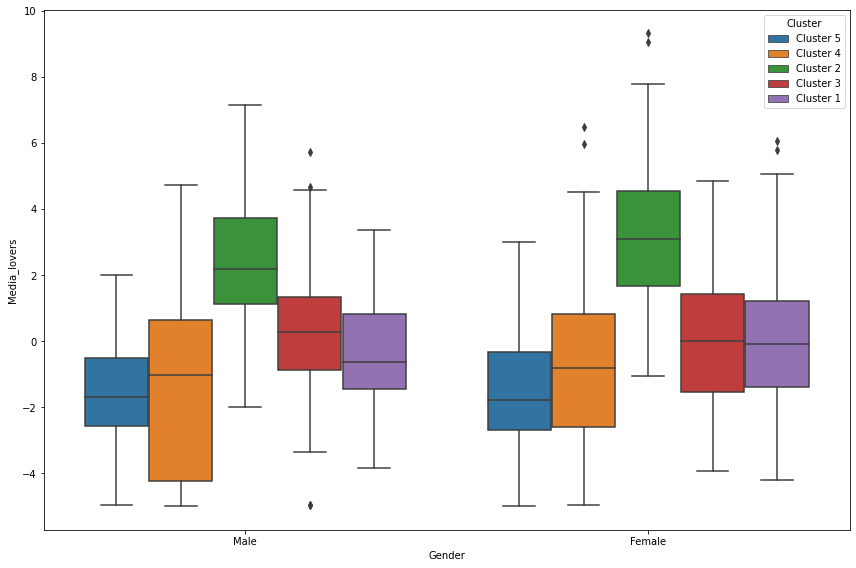

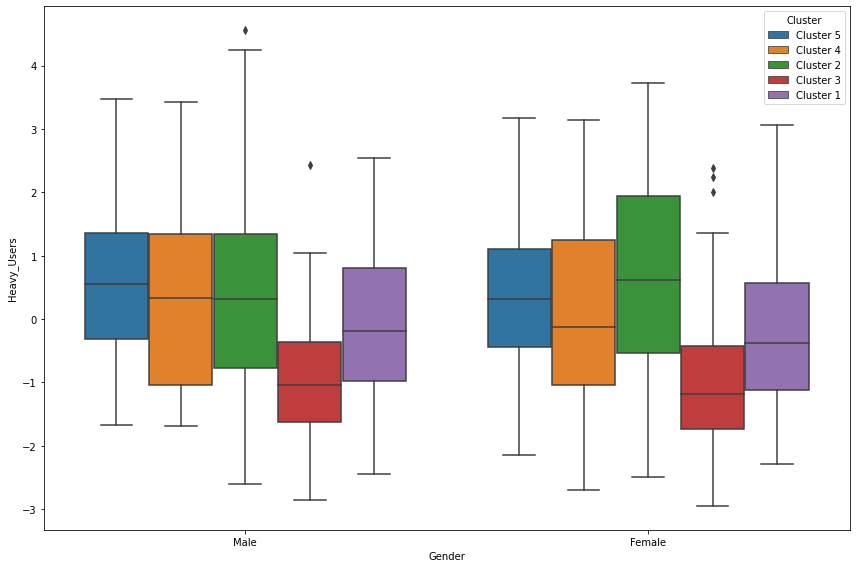

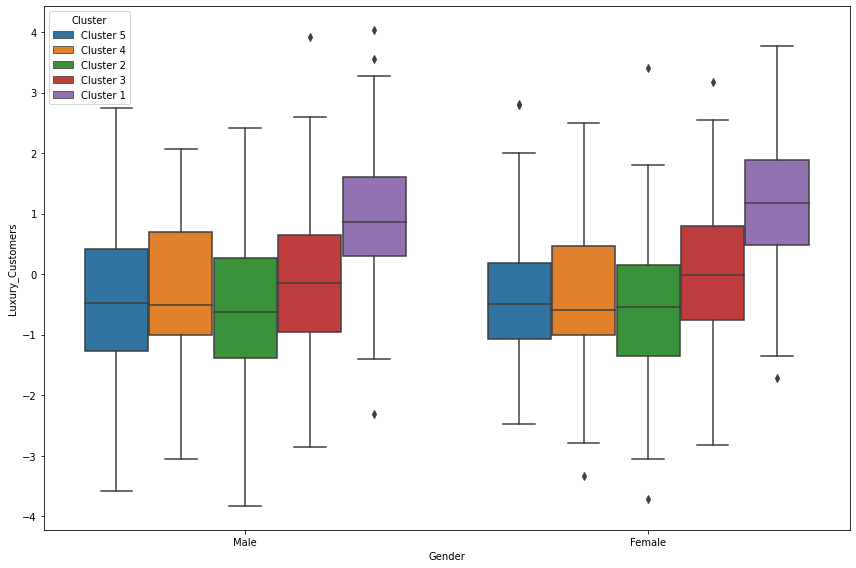

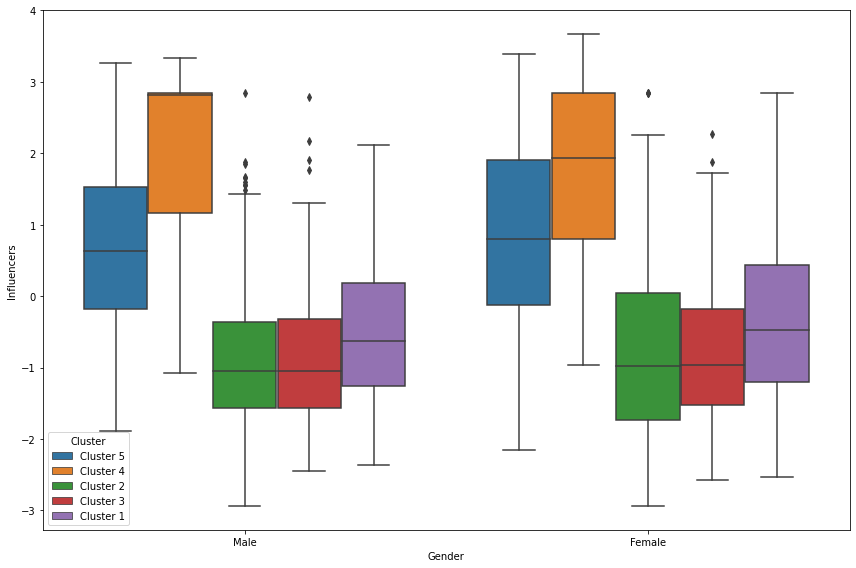

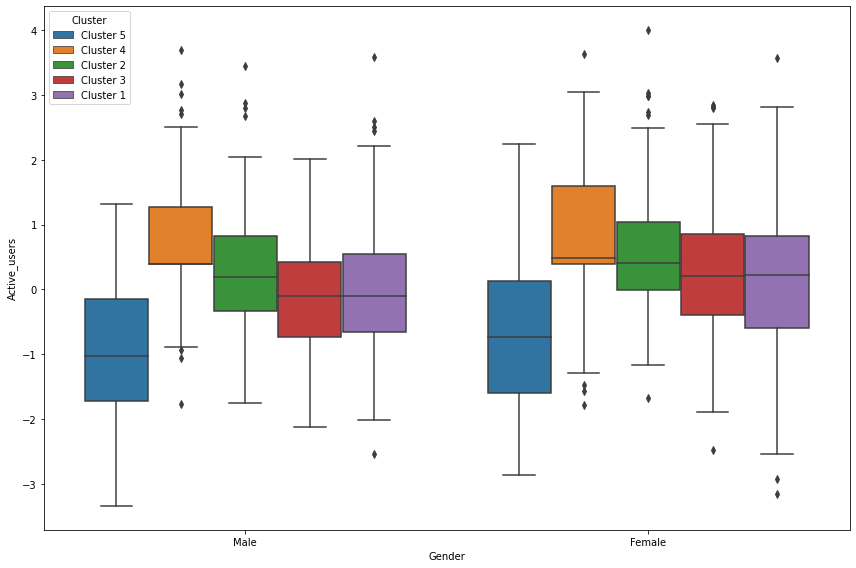

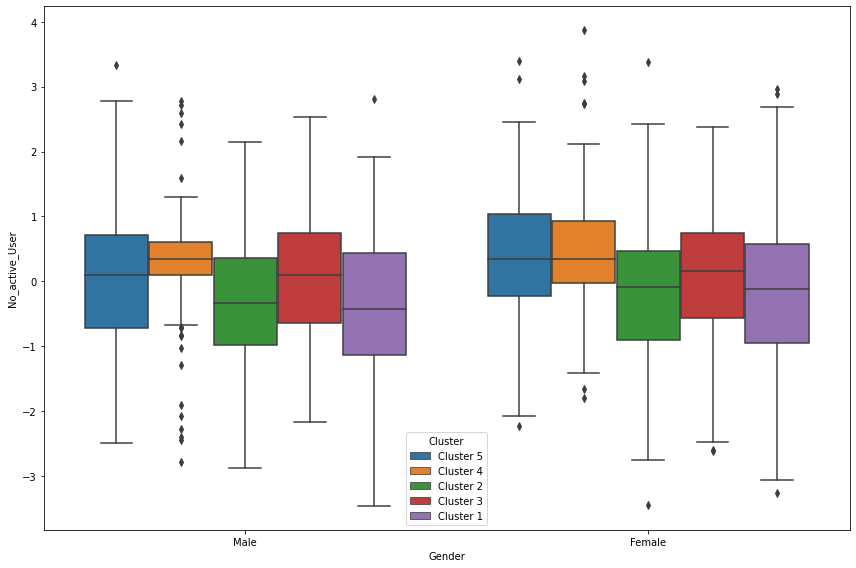

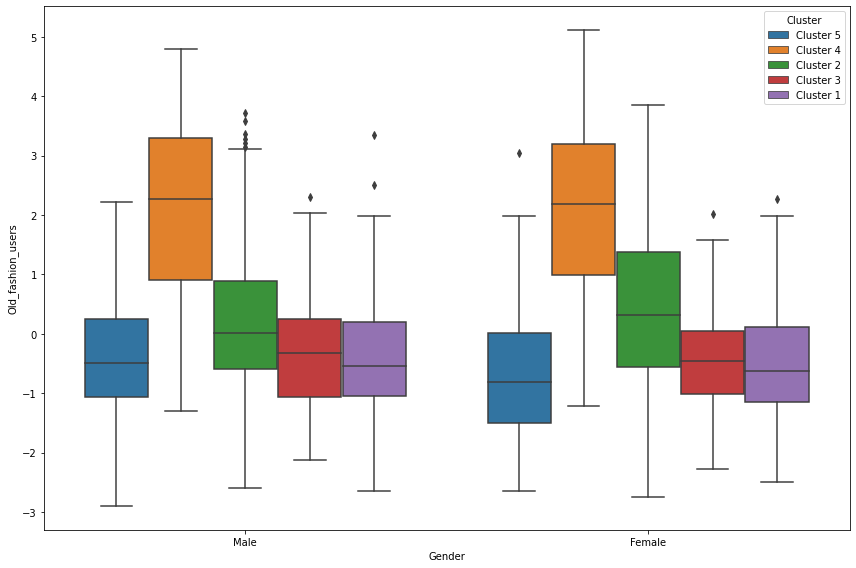

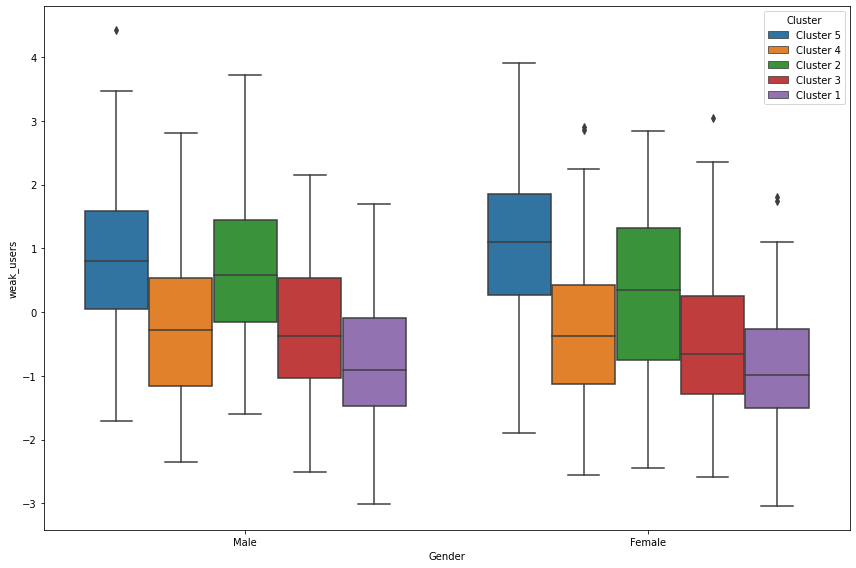

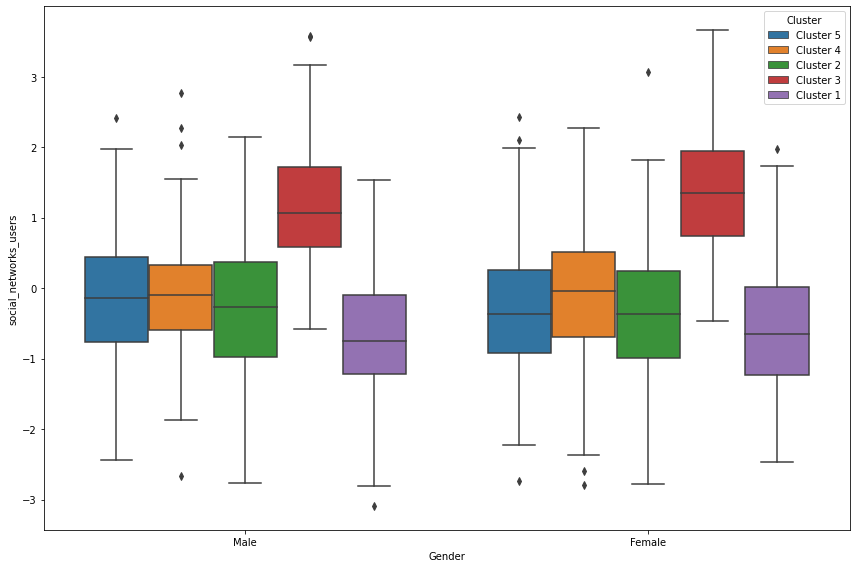

In [34]:
lst = ['Media_lovers', 
'Heavy_Users' ,
'Luxury_Customers',
'Influencers',
'Active_users',
'No_active_User',
'Old_fashion_users',
'weak_users',
'social_networks_users']
for i in lst:
    #plotting all the segments
    fig, ax = plt.subplots(figsize = (12, 8))
    sns.boxplot(x = 'Gender',
                y = i,
                hue = 'Cluster',
                data = data_df)


    # formatting and displaying the plot
    plt.tight_layout()
    plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h4>Cluster 2 vs Gender :</h4>

Female gender is more dominant in social network users. we can recommend to our marketing department that they can target female group for improving the product sale.

<h4>Cluster 1 vs Gender :</h4>

Similarly we also observed that female group is dominant in Luxury Customers, so marketing team should focus more to improve the productivity of luxury product to sustain female group as their Loyal customers.

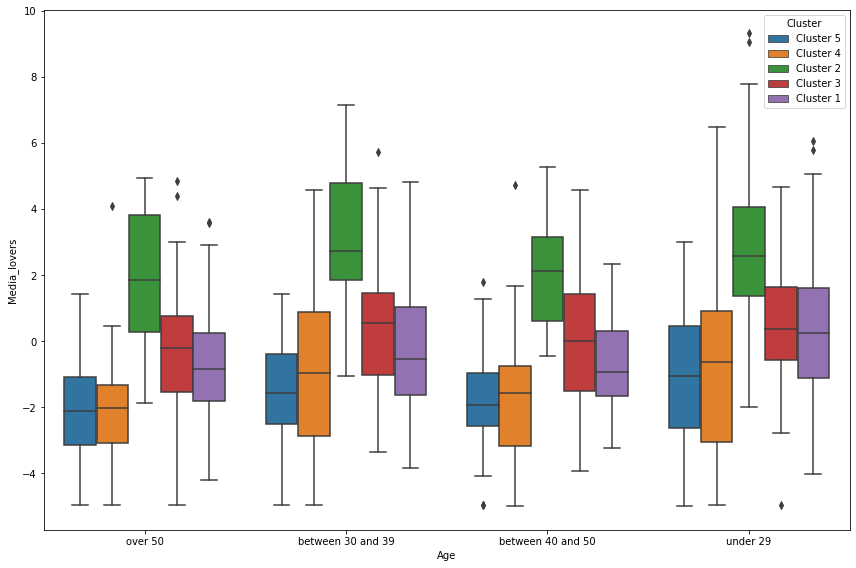

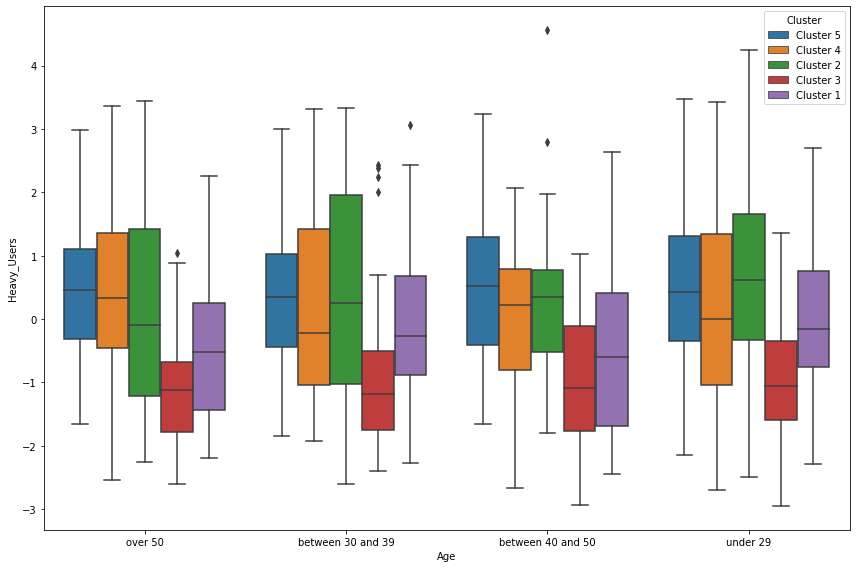

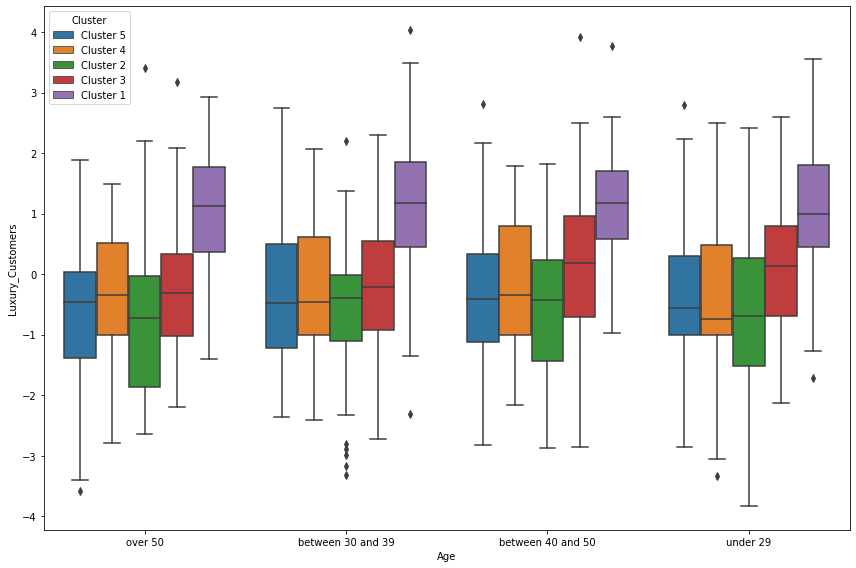

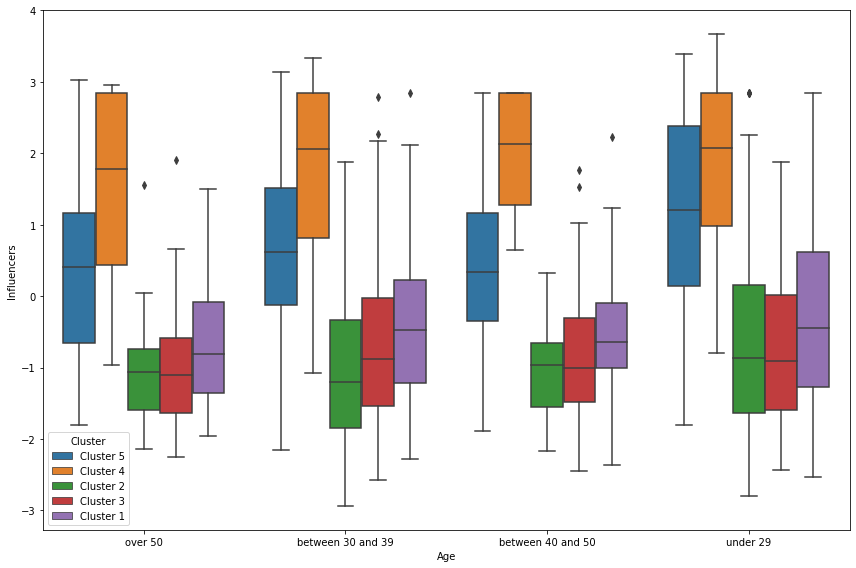

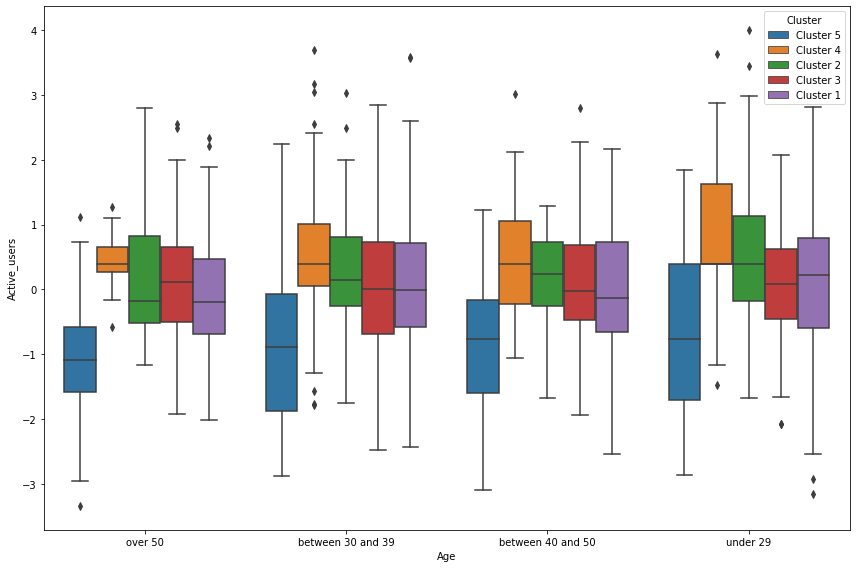

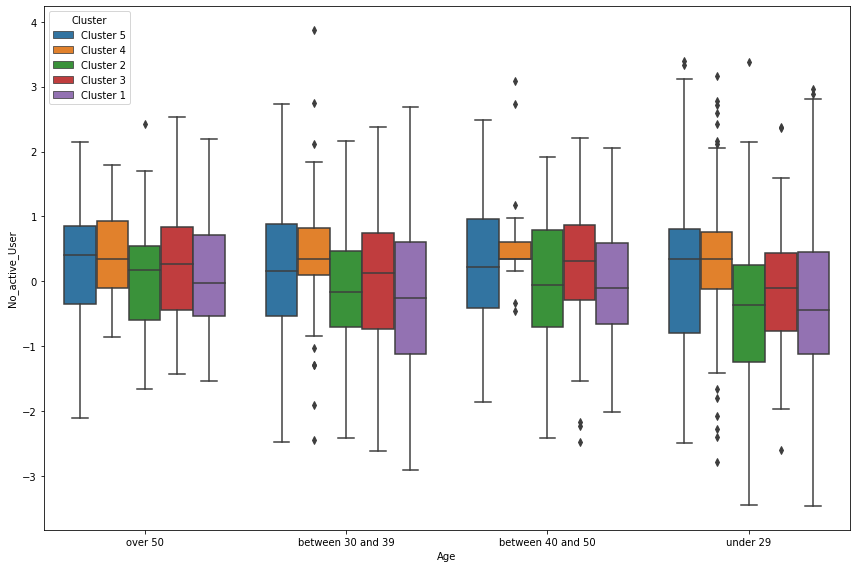

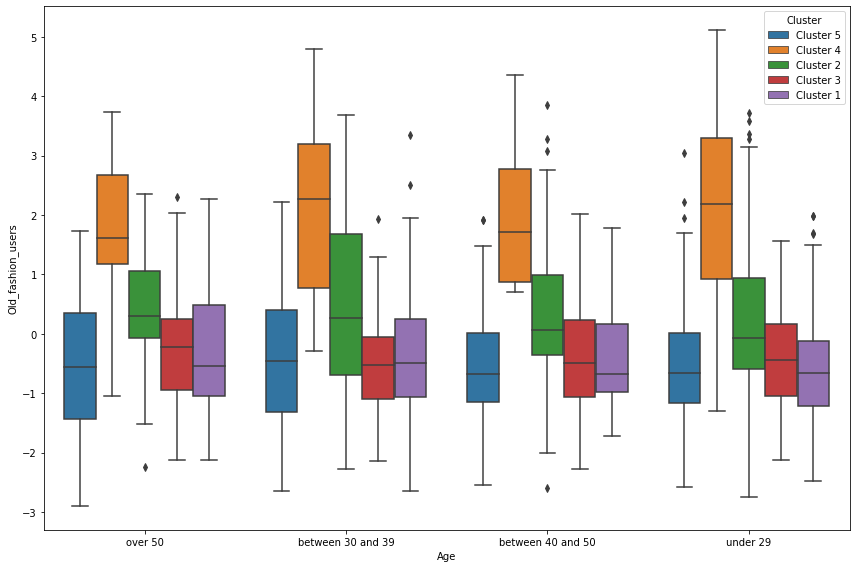

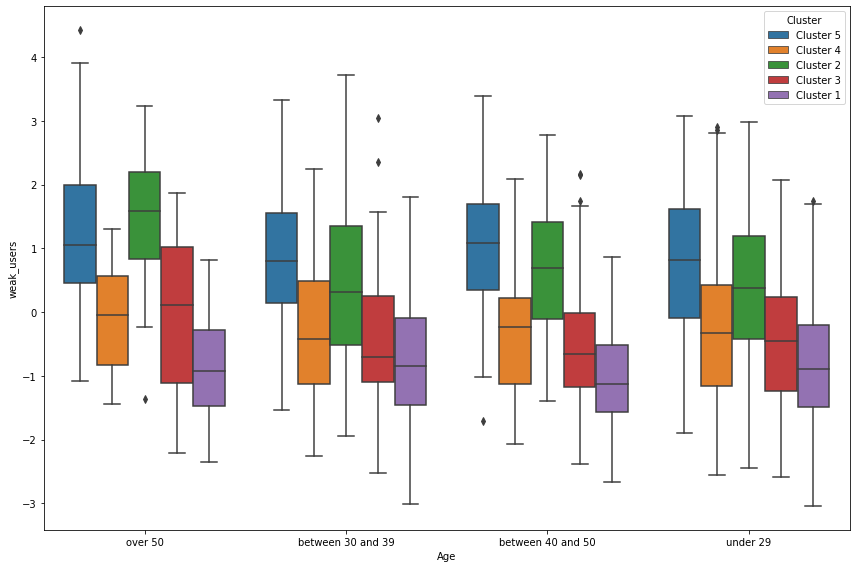

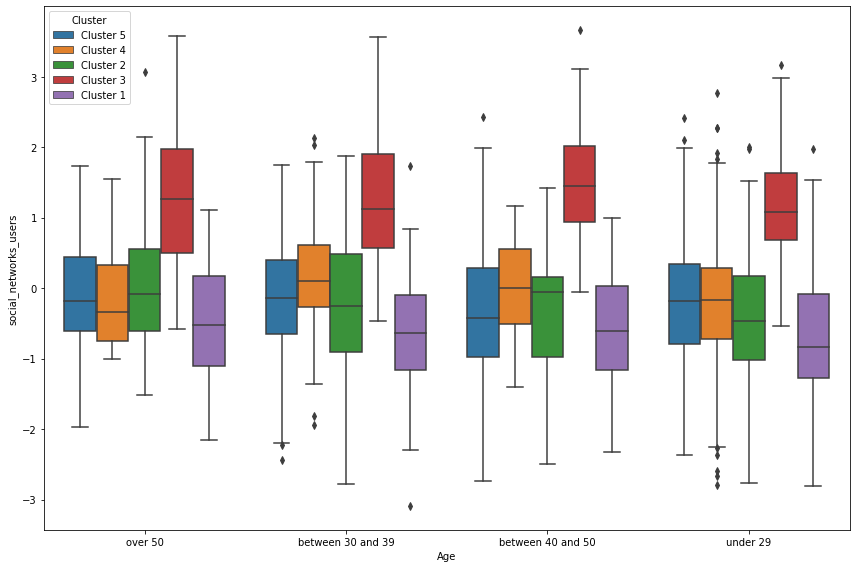

In [35]:
lst = ['Media_lovers', 
'Heavy_Users' ,
'Luxury_Customers',
'Influencers',
'Active_users',
'No_active_User',
'Old_fashion_users',
'weak_users',
'social_networks_users']
for i in lst:
    #plotting all the segments
    fig, ax = plt.subplots(figsize = (12, 8))
    sns.boxplot(x = 'Age',
                y = i,
                hue = 'Cluster',
                data = data_df)


    # formatting and displaying the plot
    plt.tight_layout()
    plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>Cluster 2 vs Age :</h4>
In age group we observed that the dominant age group is between 30 and 39 when we are comparing it with media lovers in cluster, 
Recommendation: try to introduce ads in the streaming apps, offering discounts in “paid apps”, not be massive because this group have tastes.


Analyze the PC factor loadings.

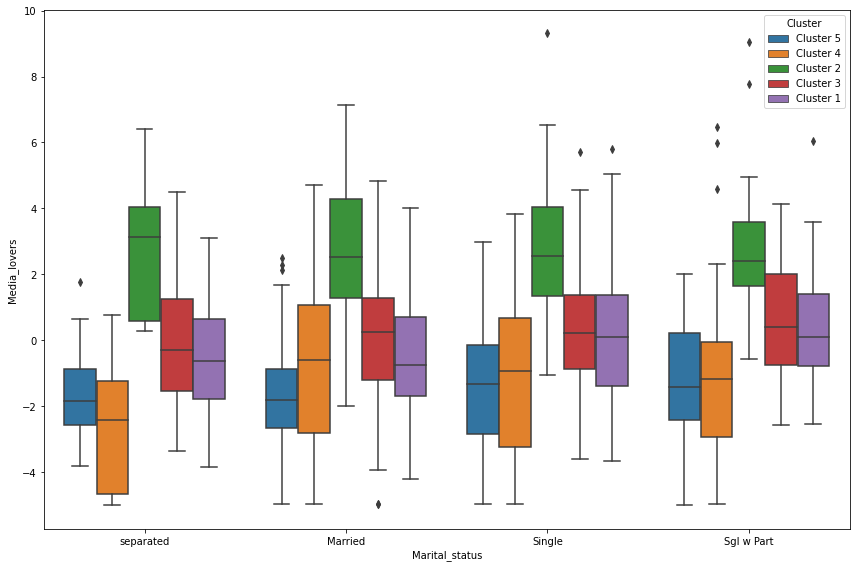

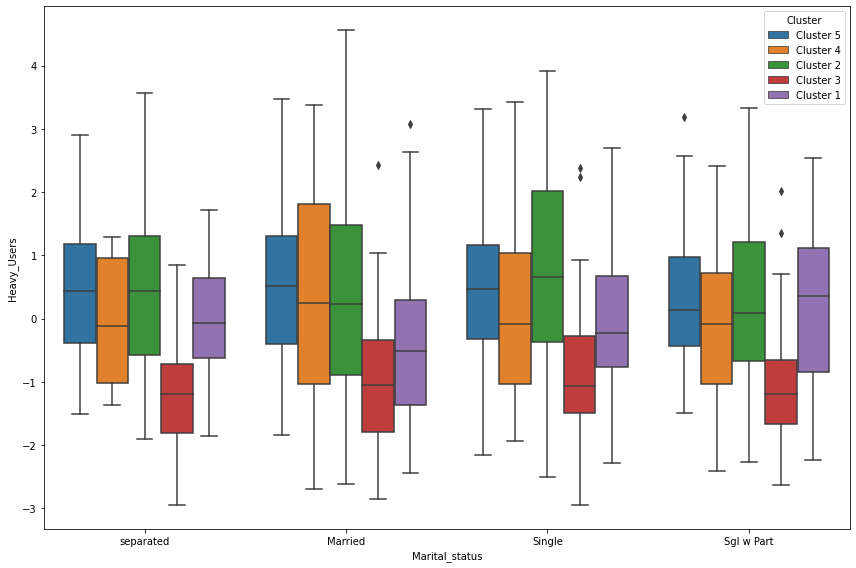

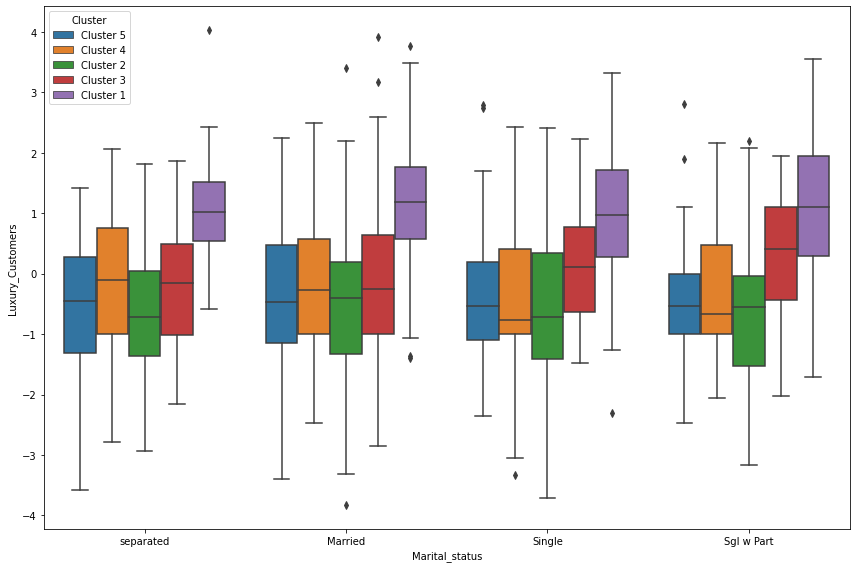

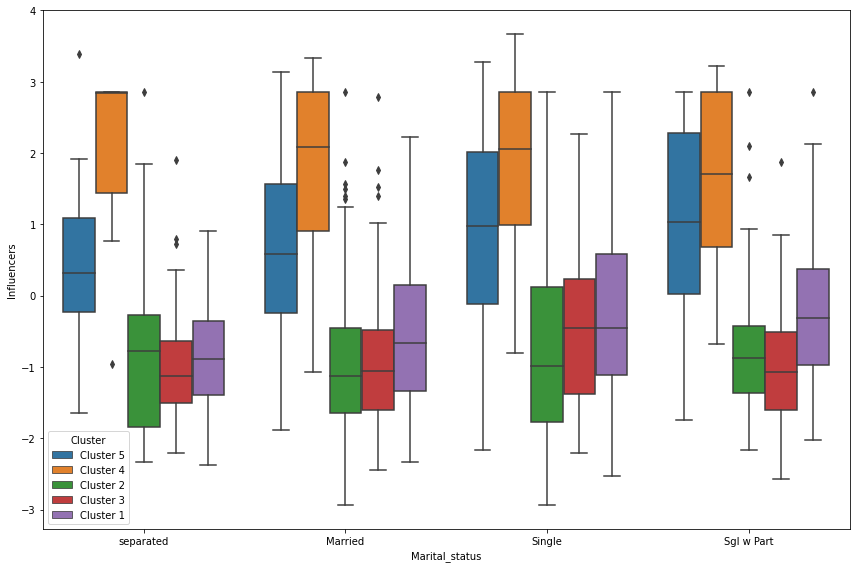

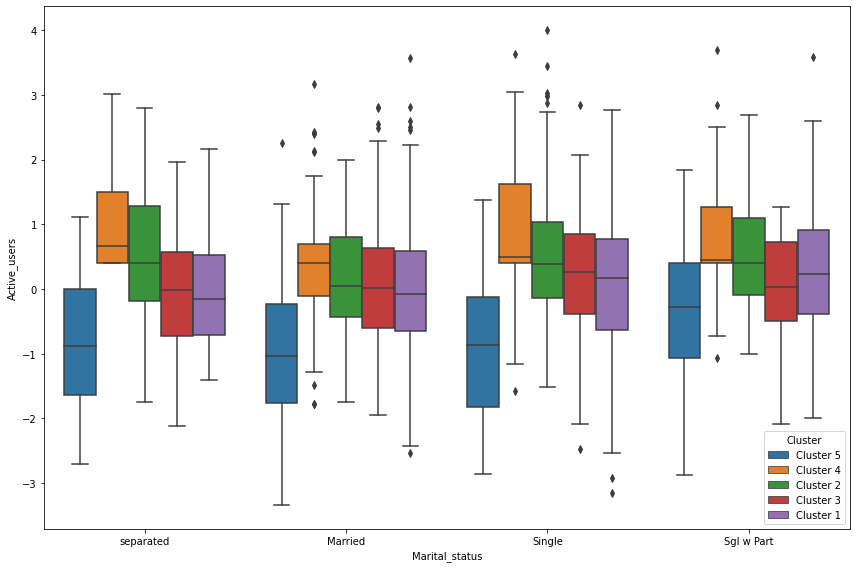

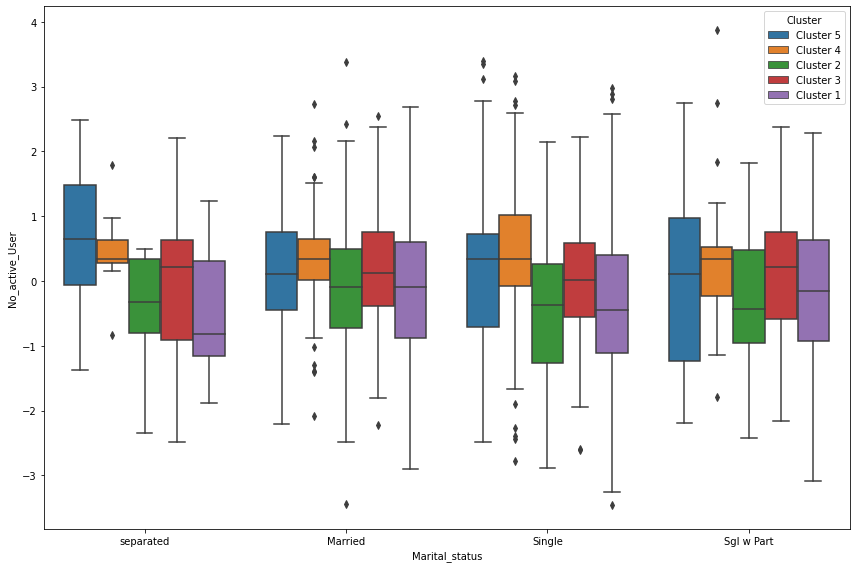

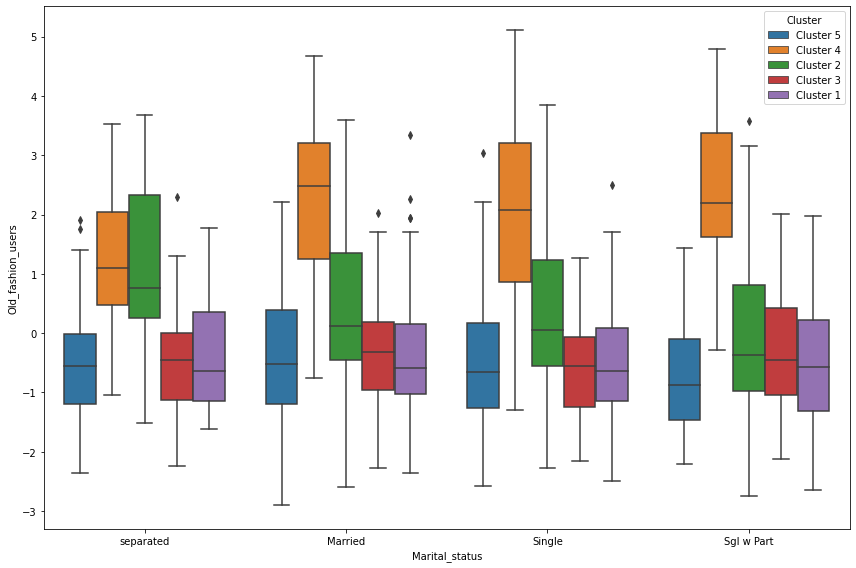

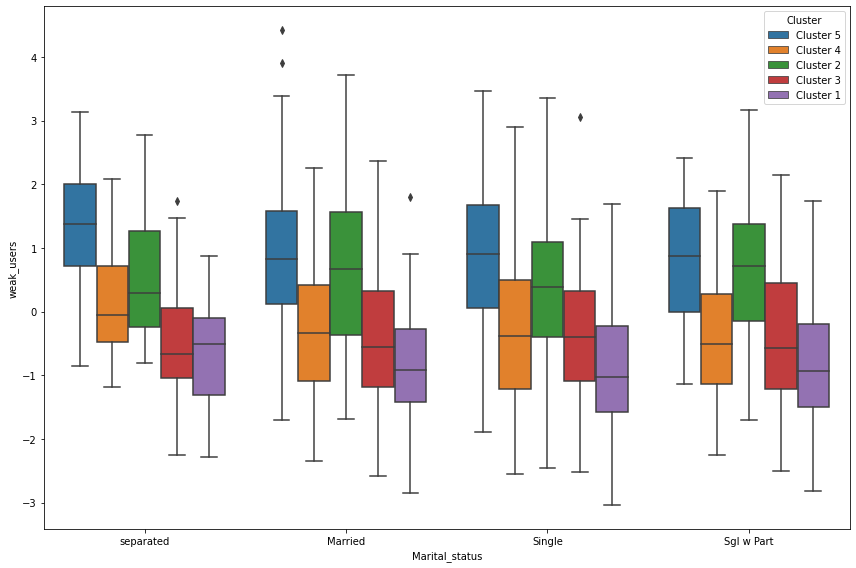

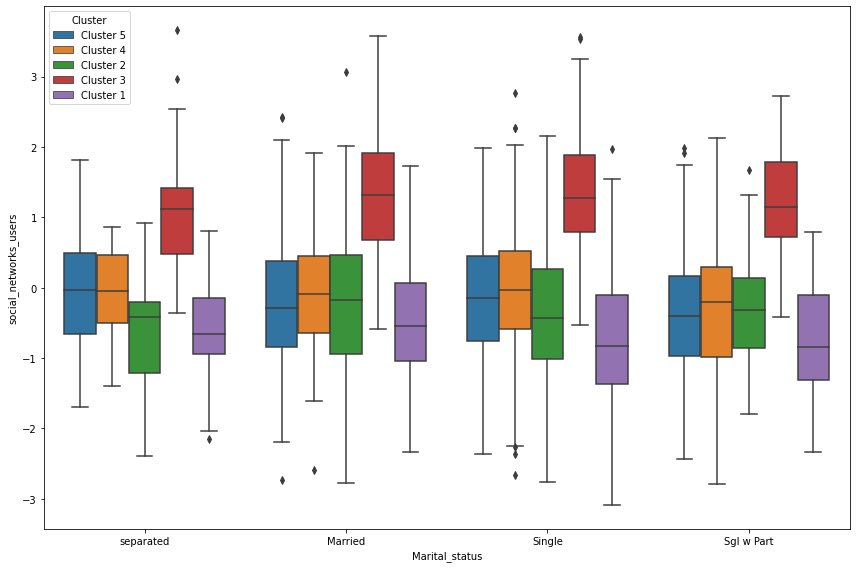

In [36]:
lst = ['Media_lovers', 
'Heavy_Users' ,
'Luxury_Customers',
'Influencers',
'Active_users',
'No_active_User',
'Old_fashion_users',
'weak_users',
'social_networks_users']
for i in lst:
    #plotting all the segments
    fig, ax = plt.subplots(figsize = (12, 8))
    sns.boxplot(x = 'Marital_status',
                y = i,
                hue = 'Cluster',
                data = data_df)


    # formatting and displaying the plot
    plt.tight_layout()
    plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4>Cluster2 vs marital status:</h4>
when we are talking about marital status with media lovers, we observed that separated group is the dominant group in using media.
<h4>Cluster4 vs marital status:</h4>
we also recorded that the people who are single mostly reject the new media streaming wave.

Recommendation: This group is classic we can try to get their information to call them or offer discount coupons in the stores, use traditional channels with them.







Customer-Level Personas

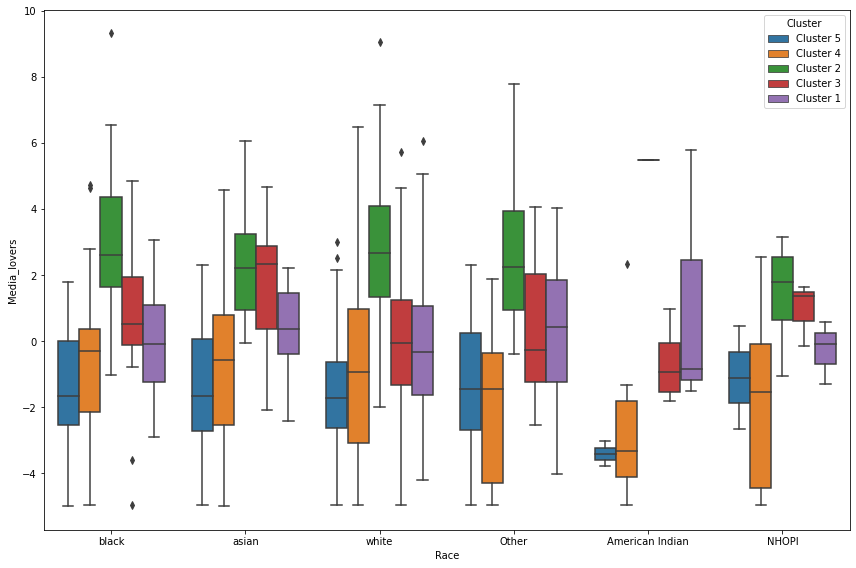

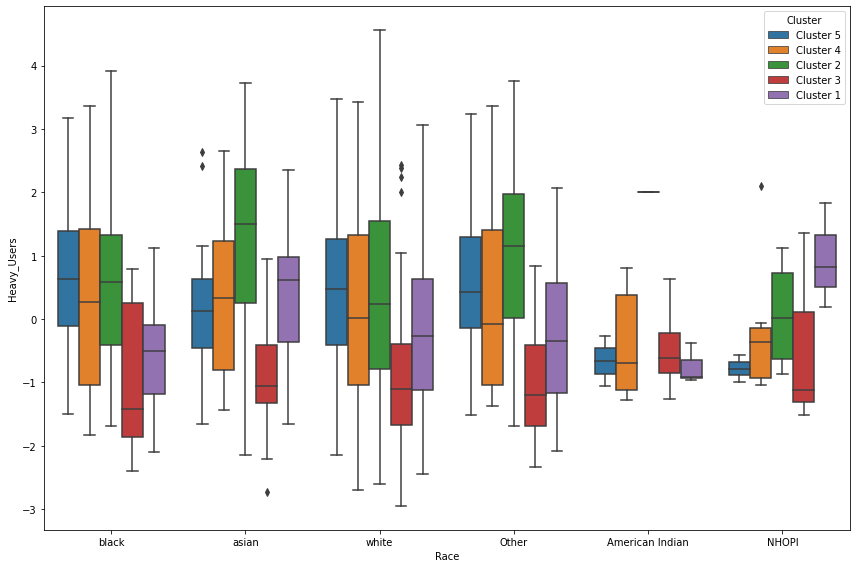

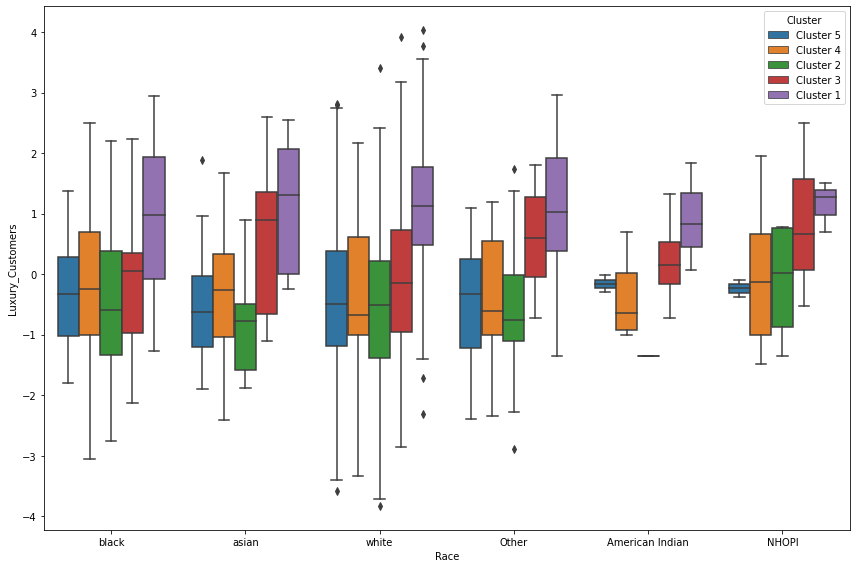

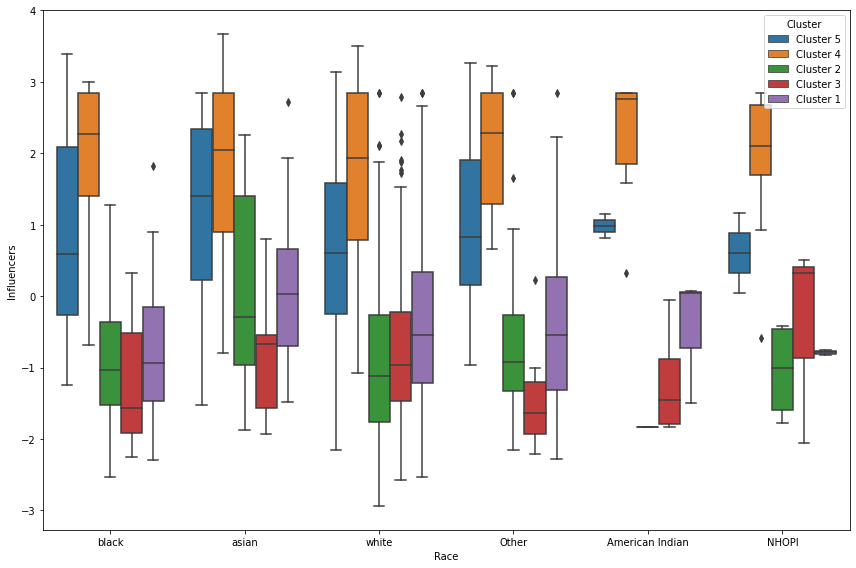

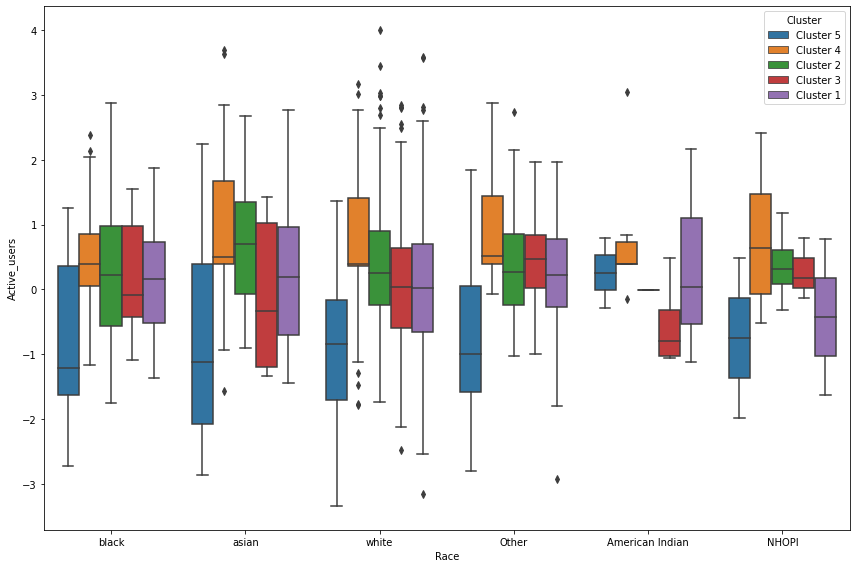

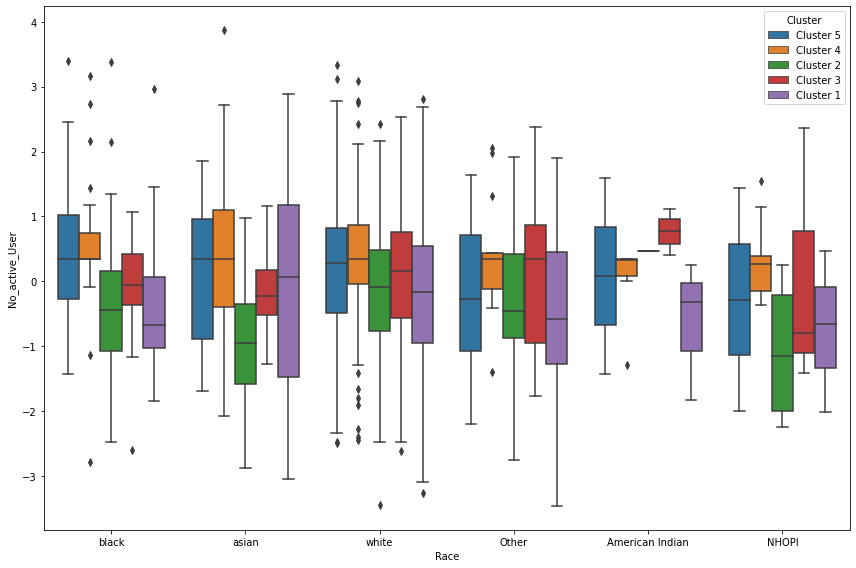

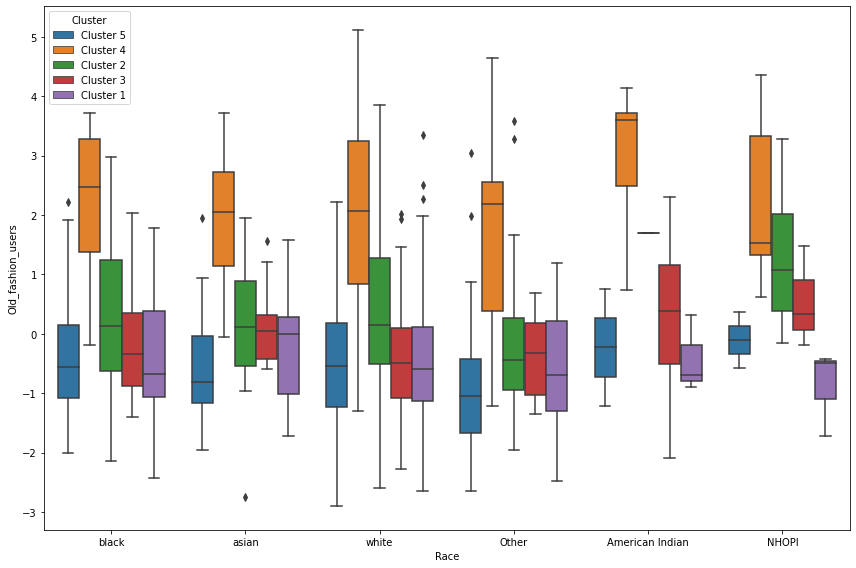

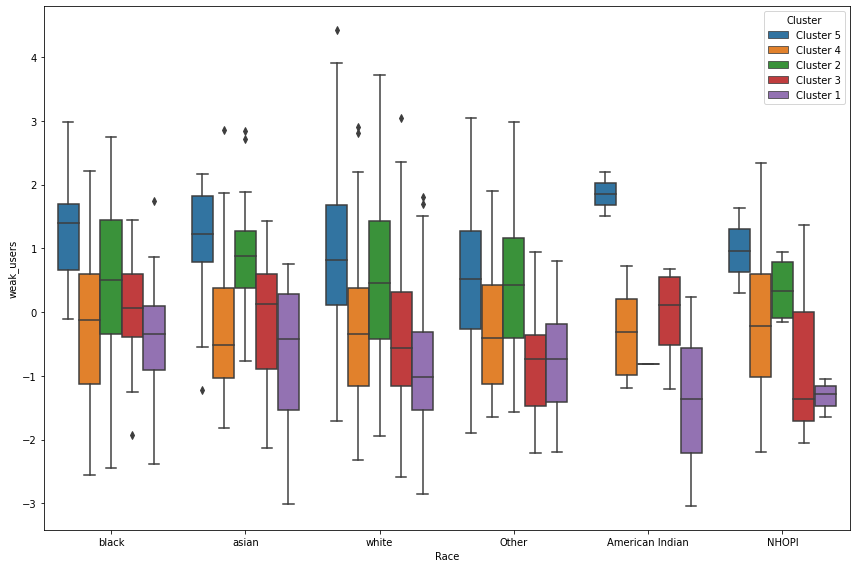

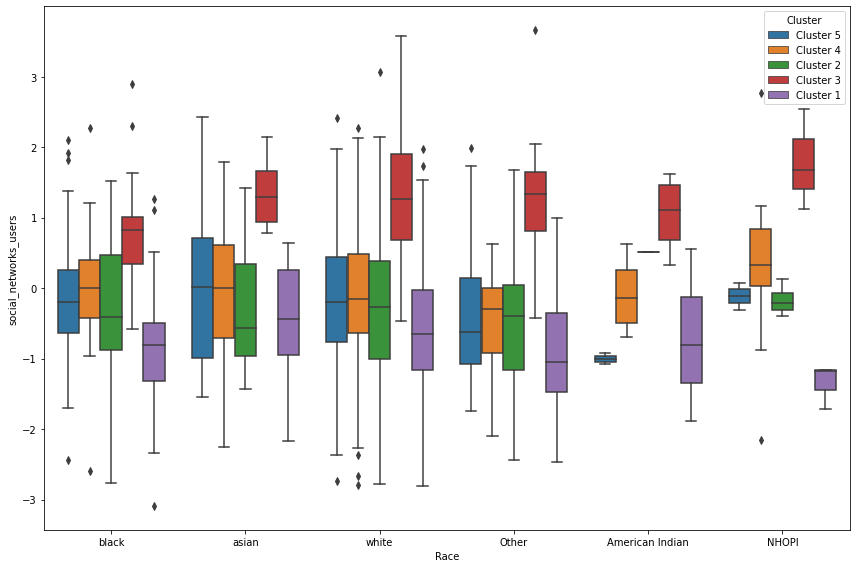

In [37]:
lst = ['Media_lovers', 
'Heavy_Users' ,
'Luxury_Customers',
'Influencers',
'Active_users',
'No_active_User',
'Old_fashion_users',
'weak_users',
'social_networks_users']
for i in lst:
    #plotting all the segments
    fig, ax = plt.subplots(figsize = (12, 8))
    sns.boxplot(x = 'Race',
                y = i,
                hue = 'Cluster',
                data = data_df)


    # formatting and displaying the plot
    plt.tight_layout()
    plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h4> Cluster1 vs Race:</h4>
when we are comparing the demographic comparison in term of race with Luxury Customers, we observed that social networks users are the dominant segment of the market.
recommendation:
This group is Asian we can try to get their information to call them or offer discount coupons in the stores, we can work more to provide product to Asian customer on time.


Analyze and name each principal component based on its factor loading.

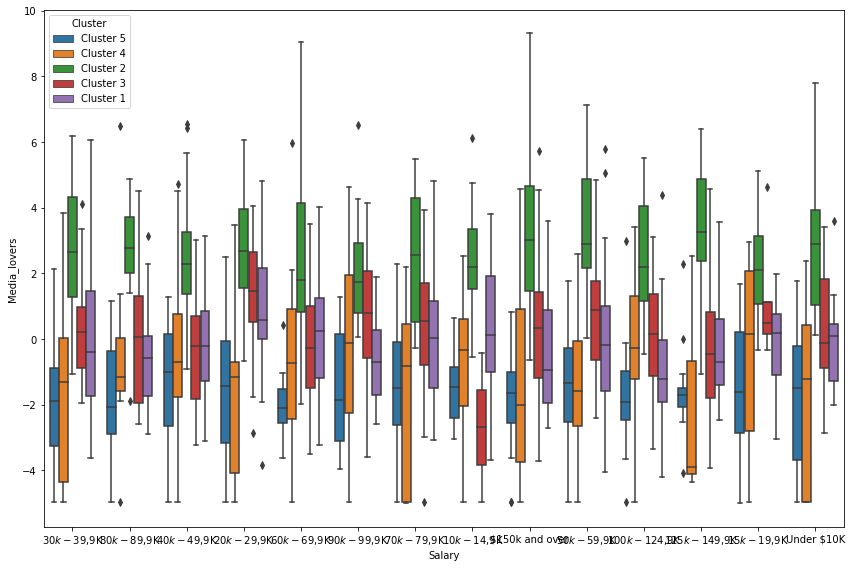

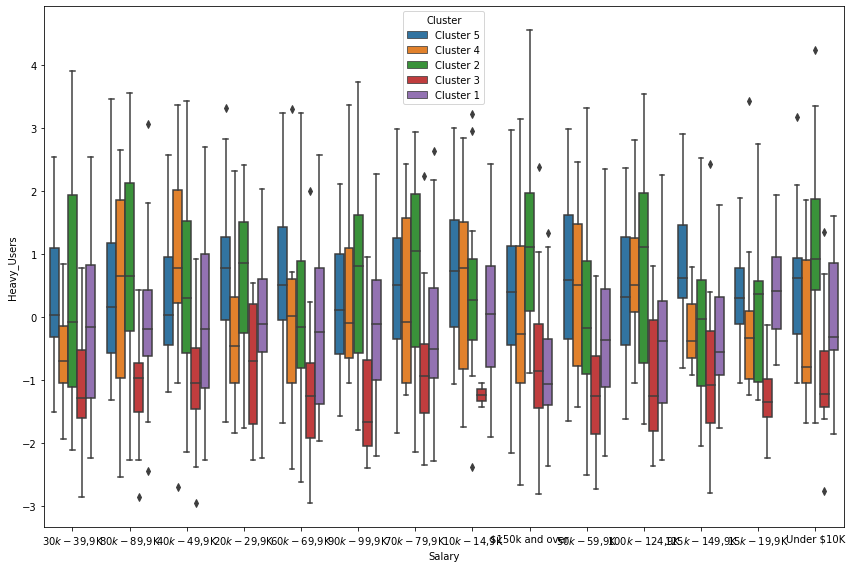

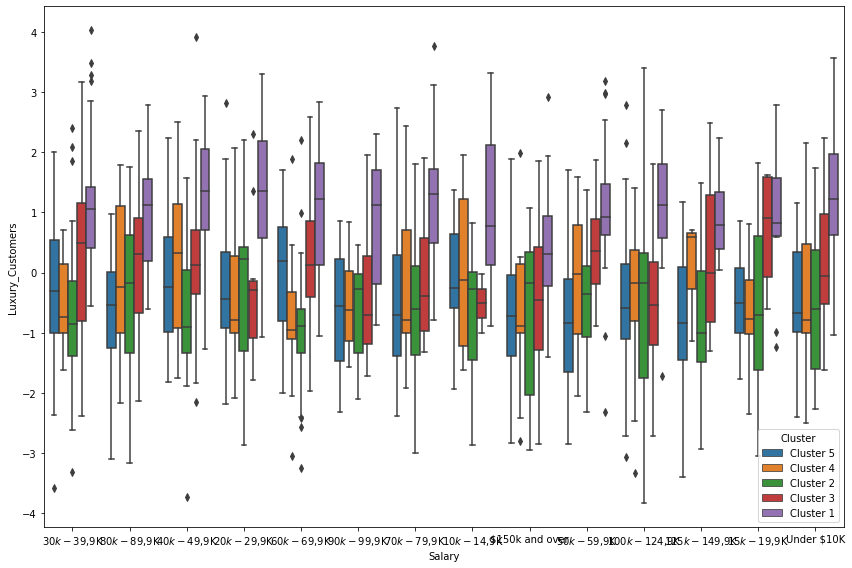

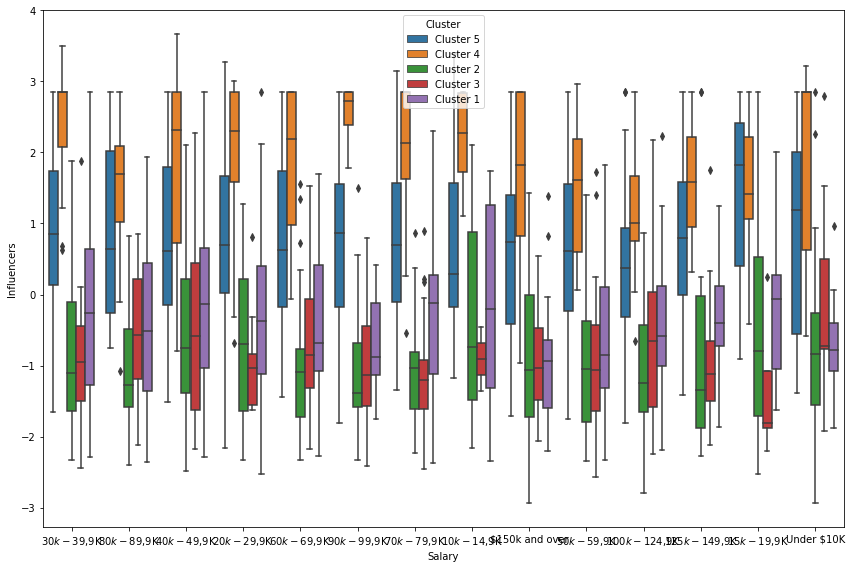

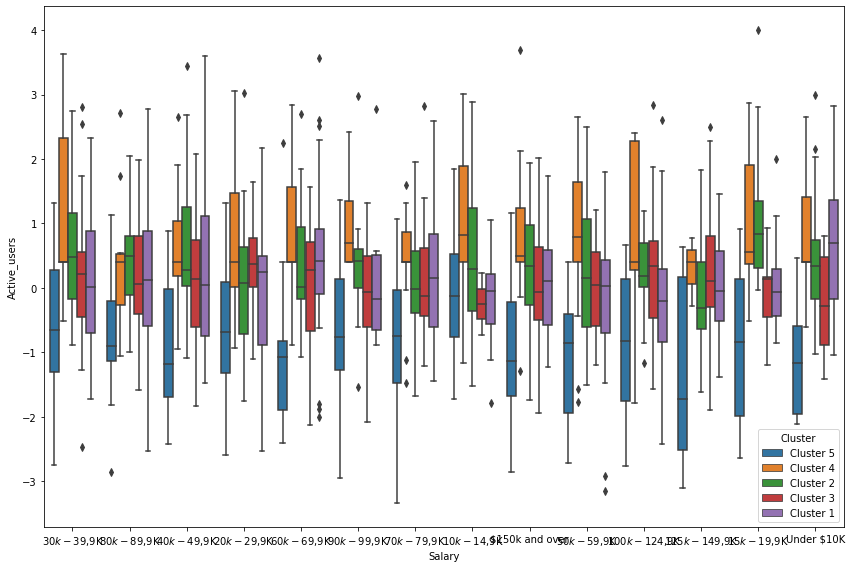

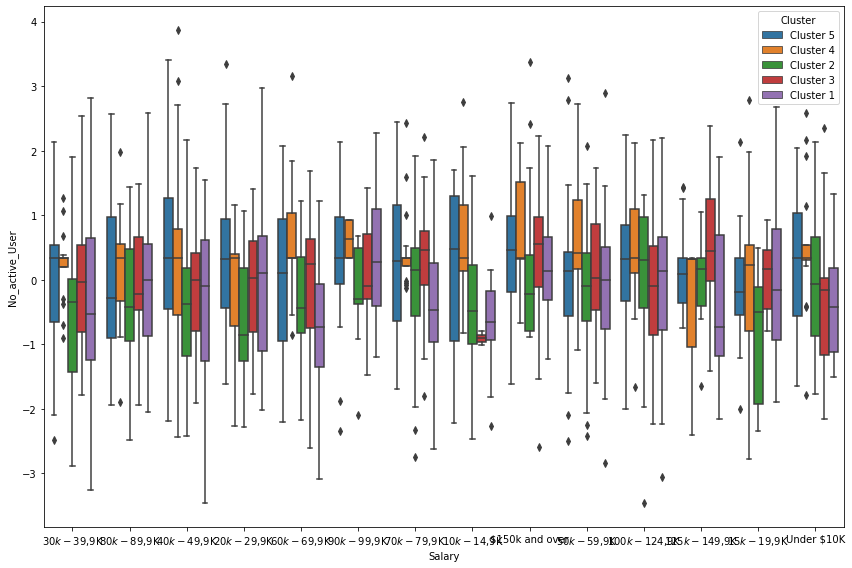

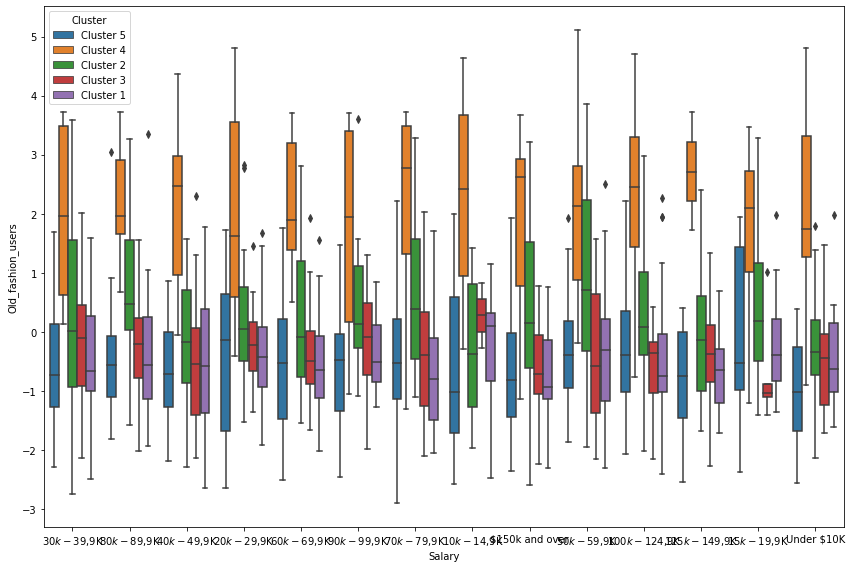

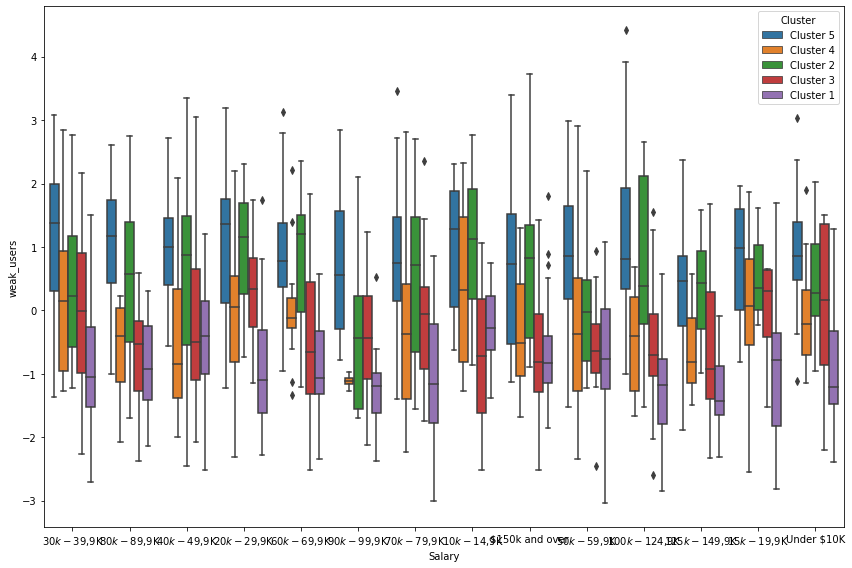

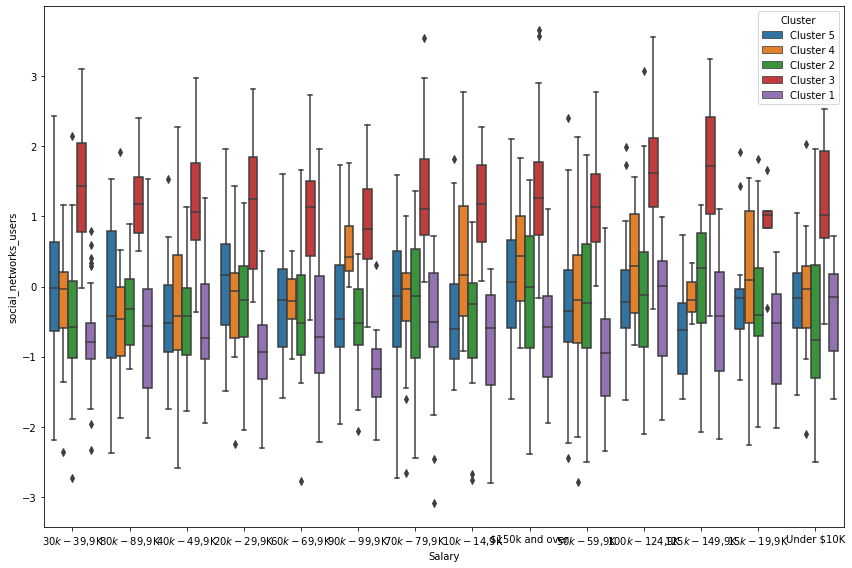

In [38]:
lst = ['Media_lovers', 
'Heavy_Users' ,
'Luxury_Customers',
'Influencers',
'Active_users',
'No_active_User',
'Old_fashion_users',
'weak_users',
'social_networks_users']
for i in lst:
    #plotting all the segments
    fig, ax = plt.subplots(figsize = (12, 8))
    sns.boxplot(x = 'Salary',
                y = i,
                hue = 'Cluster',
                data = data_df)


    # formatting and displaying the plot
    plt.tight_layout()
    plt.show()

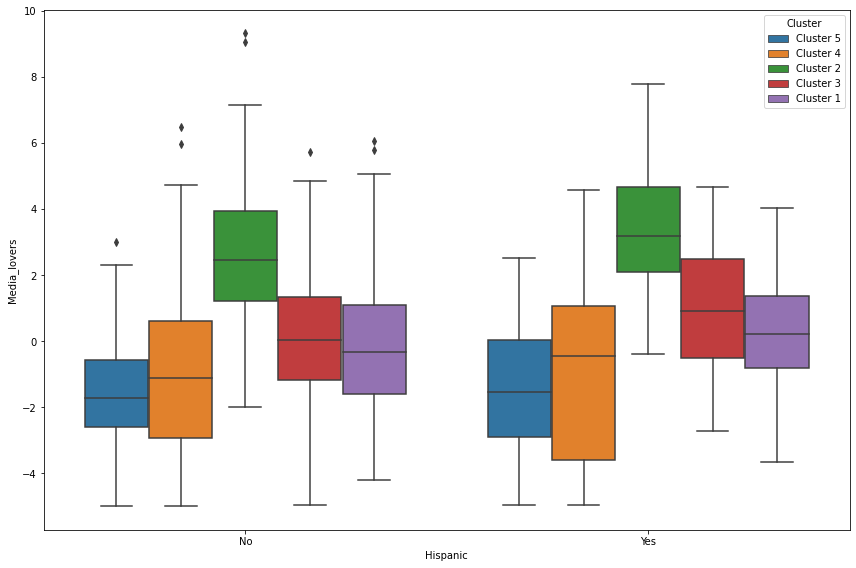

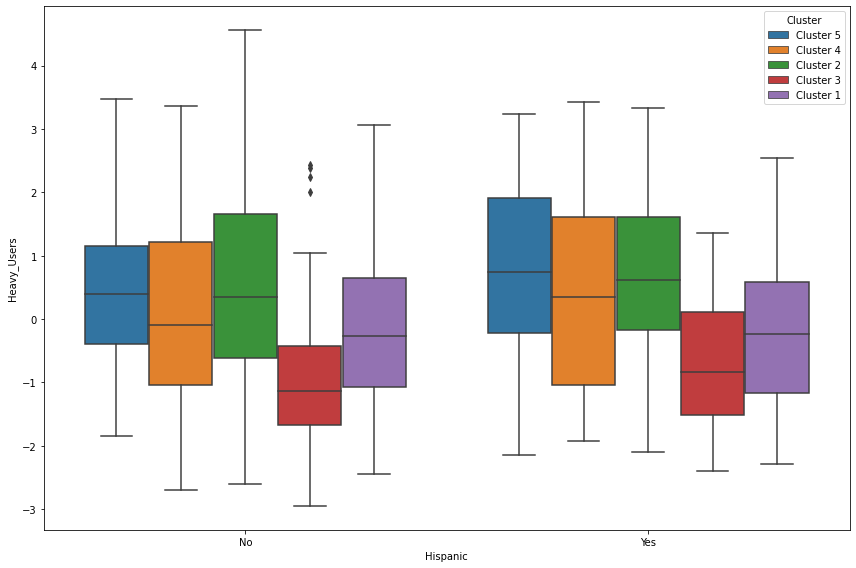

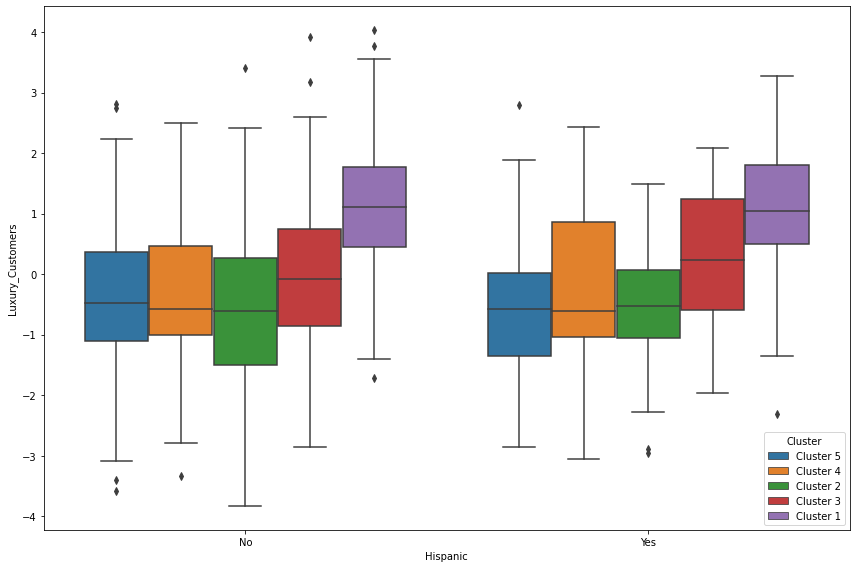

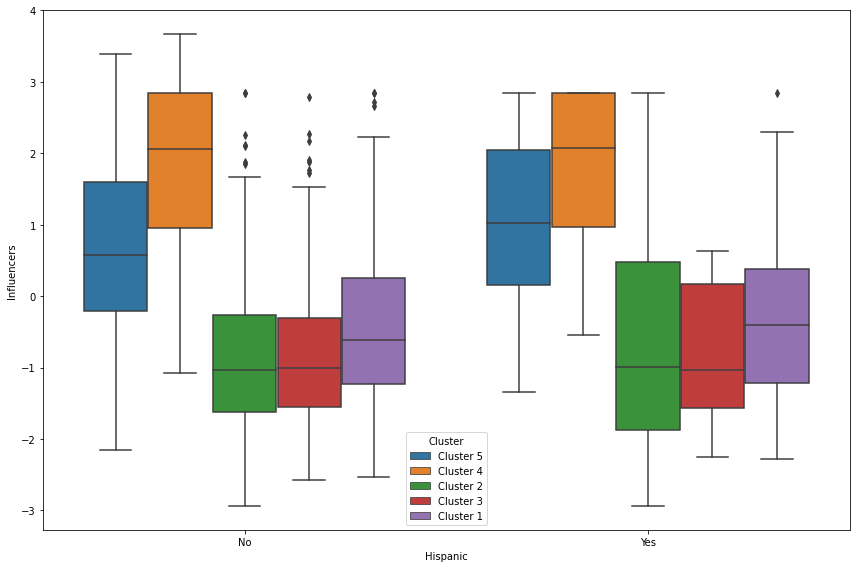

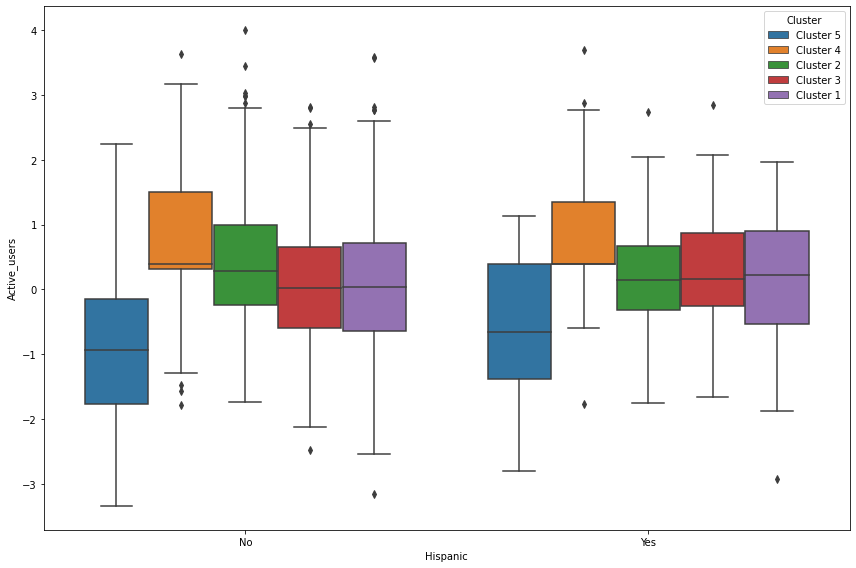

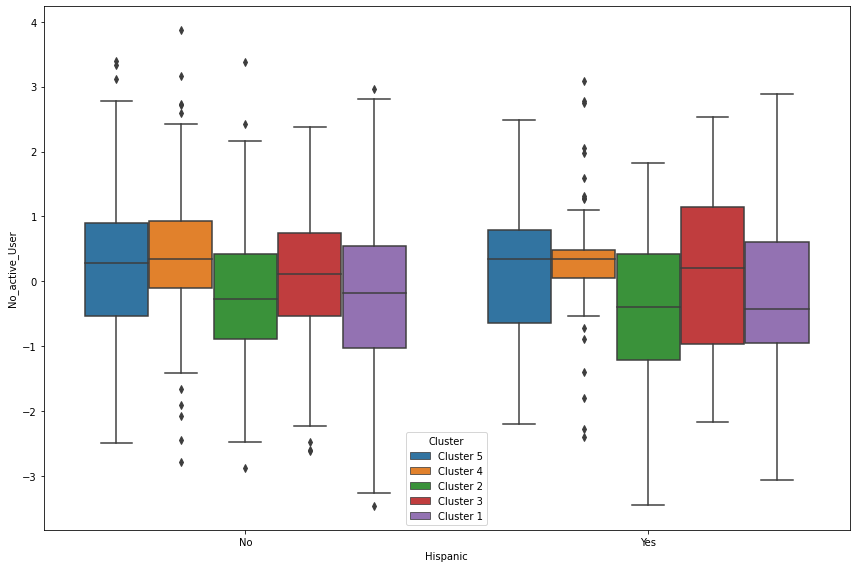

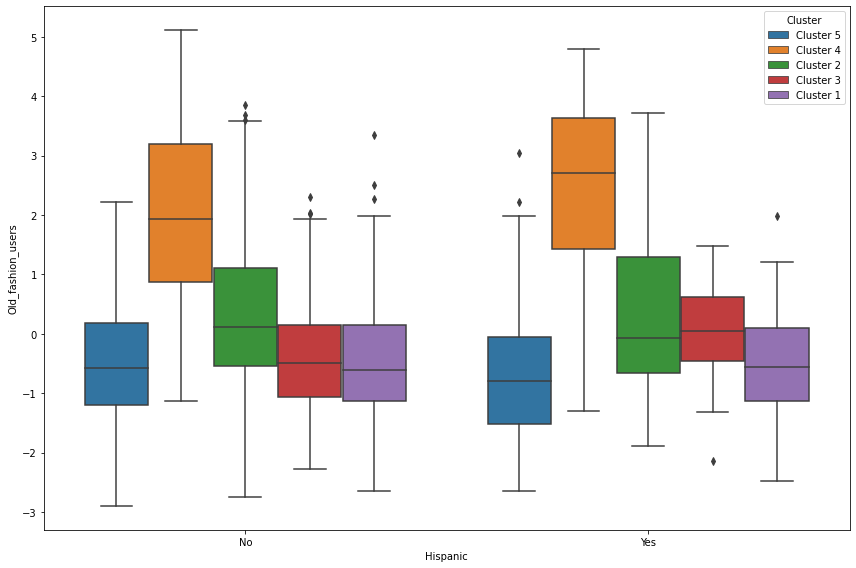

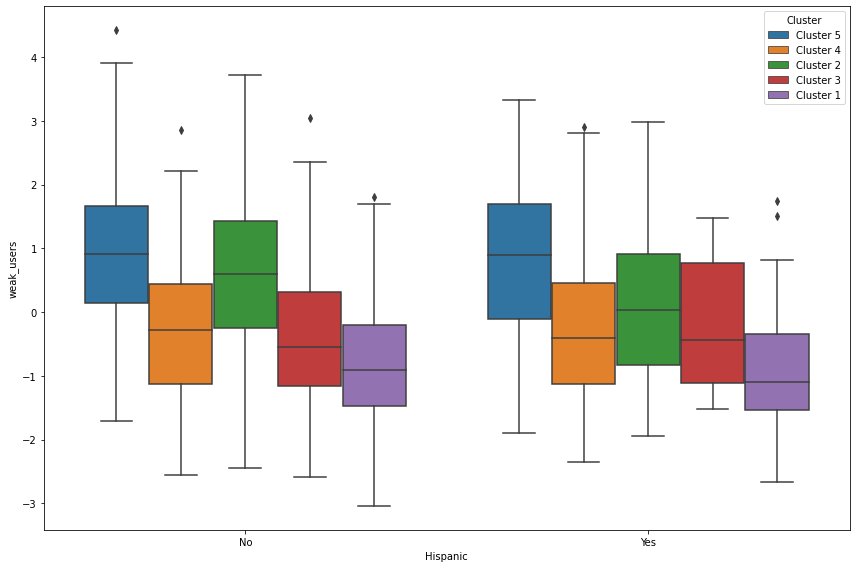

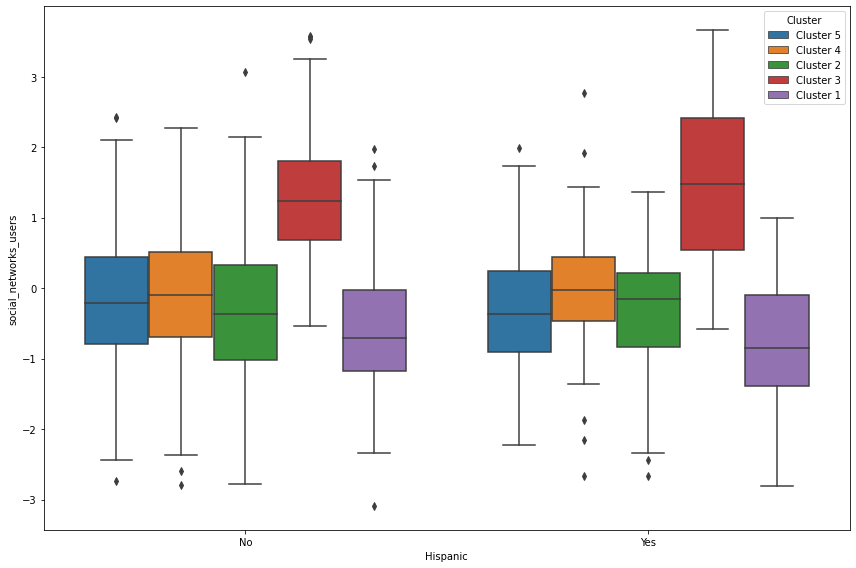

In [39]:
lst = ['Media_lovers', 
'Heavy_Users' ,
'Luxury_Customers',
'Influencers',
'Active_users',
'No_active_User',
'Old_fashion_users',
'weak_users',
'social_networks_users']
for i in lst:
    #plotting all the segments
    fig, ax = plt.subplots(figsize = (12, 8))
    sns.boxplot(x = 'Hispanic',
                y = i,
                hue = 'Cluster',
                data = data_df)


    # formatting and displaying the plot
    plt.tight_layout()
    plt.show()


<h3><span class="girk">SUMMARY</span></h3>

To conclude, after reducing the variables, segment our base in 5 cluster and identify the demographic preferences in each one, we recommend to the marketing the team the following:
a)	Definitely our 30s customer would be more interesting in our products if we show them when they are seeing a movie in a streaming app, we should be also pay attention to the separated marital status population because they are inclined to this trend too. We will provide the dataset of cluster 2 to the marketing team as soon as possible.
b)	Definitely single customers are classical, they are not in the mood to use digital channels this will be a challenge for the marketing team, a cross selling strategy will be need. The dataset of cluster 4 will be provided to the marketing team as soon as possible.
c)	Segment for race is always difficult but we have found a big opportunity with Asian people who are luxury customers. Based in the segment they are who are in the mood to pay more for getting more features, these users are considered heavy for us.  The dataset of cluster 1 will be provided to the marketing team as soon as possible

d)	Based in the segment they are who are people who spend a lot of time in social networks, the marketing should add this information to Facebook ads., something interesting about this group is they are not really part of a demographic segment. We will provide the dataset of cluster 3 to the marketing team as soon possible.
e)	Cluster 5 is the group who answer the survey with the lowest score in agreement, and they are not interested in spending more money in apps. We will warn the marketing team to always filter this group from their strategies.
